Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run1


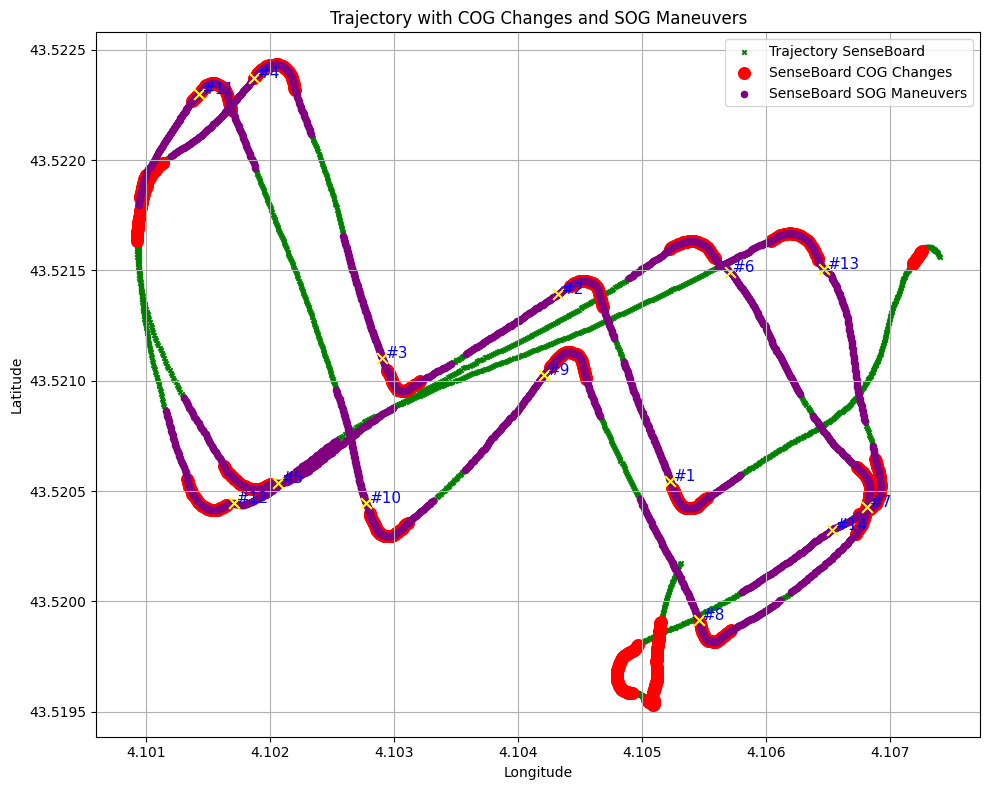

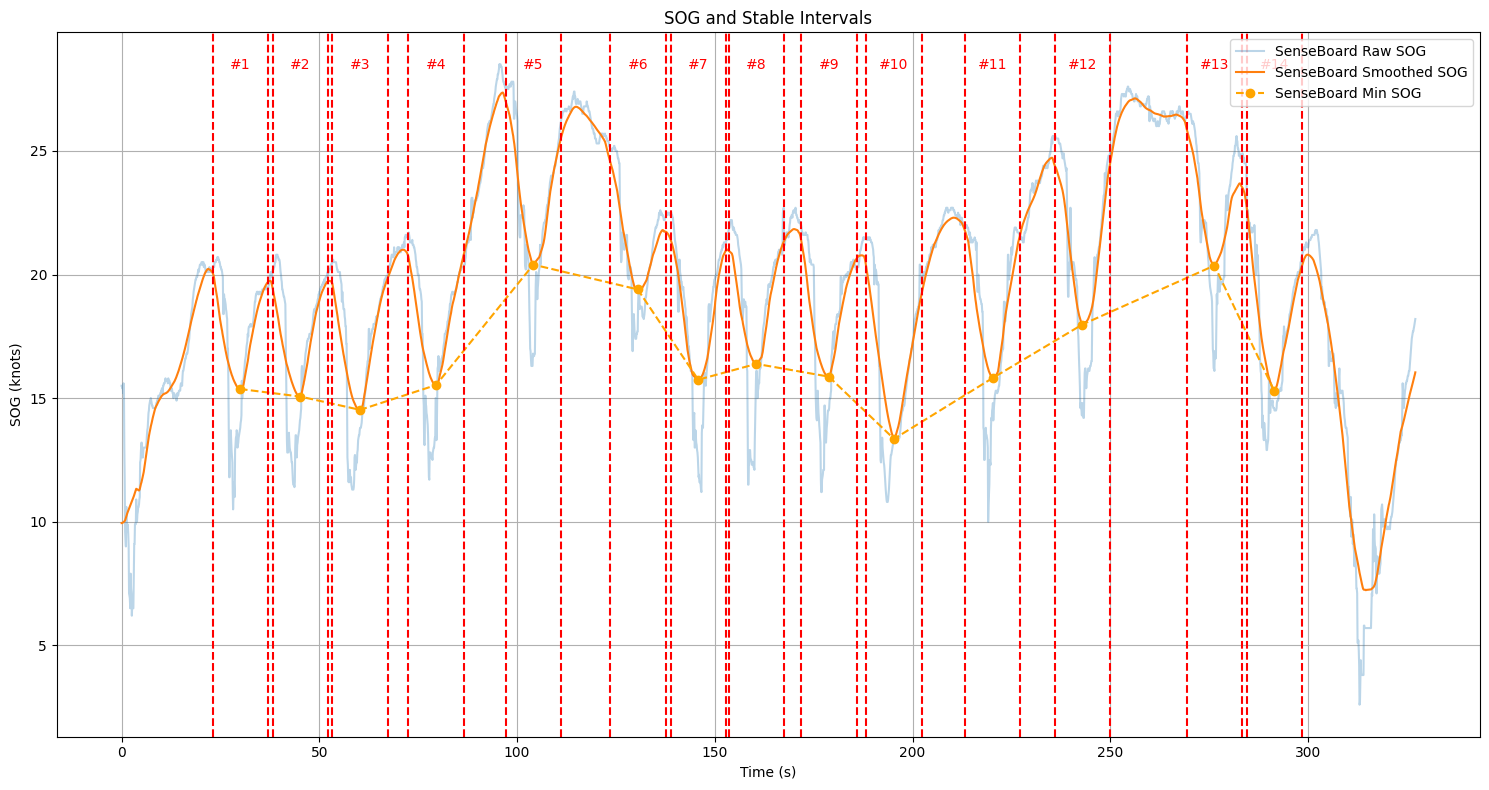

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run2


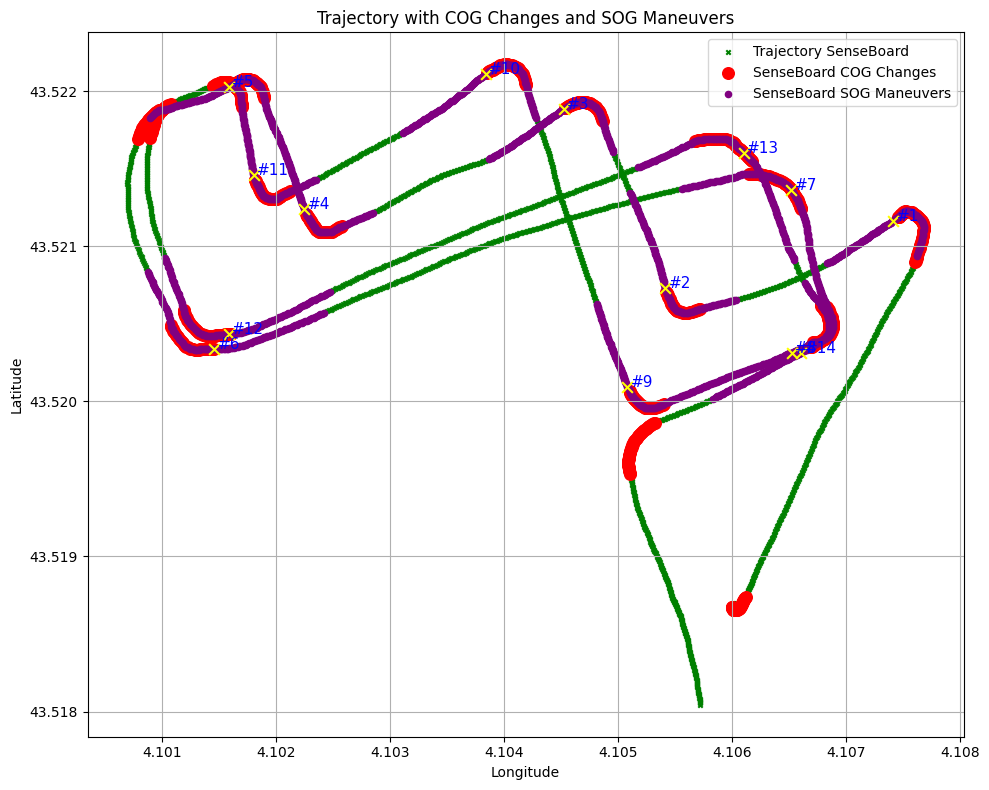

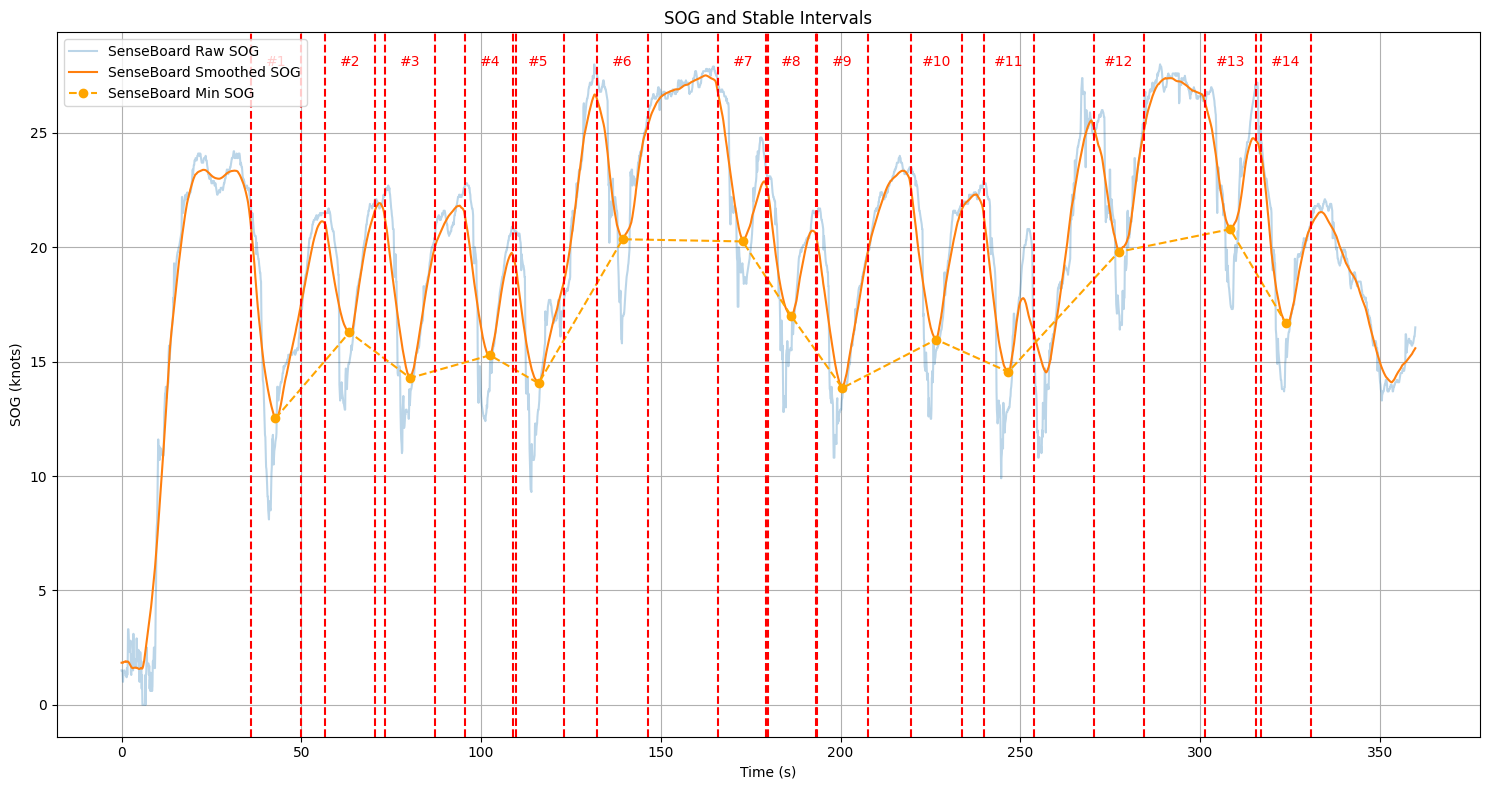

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run3


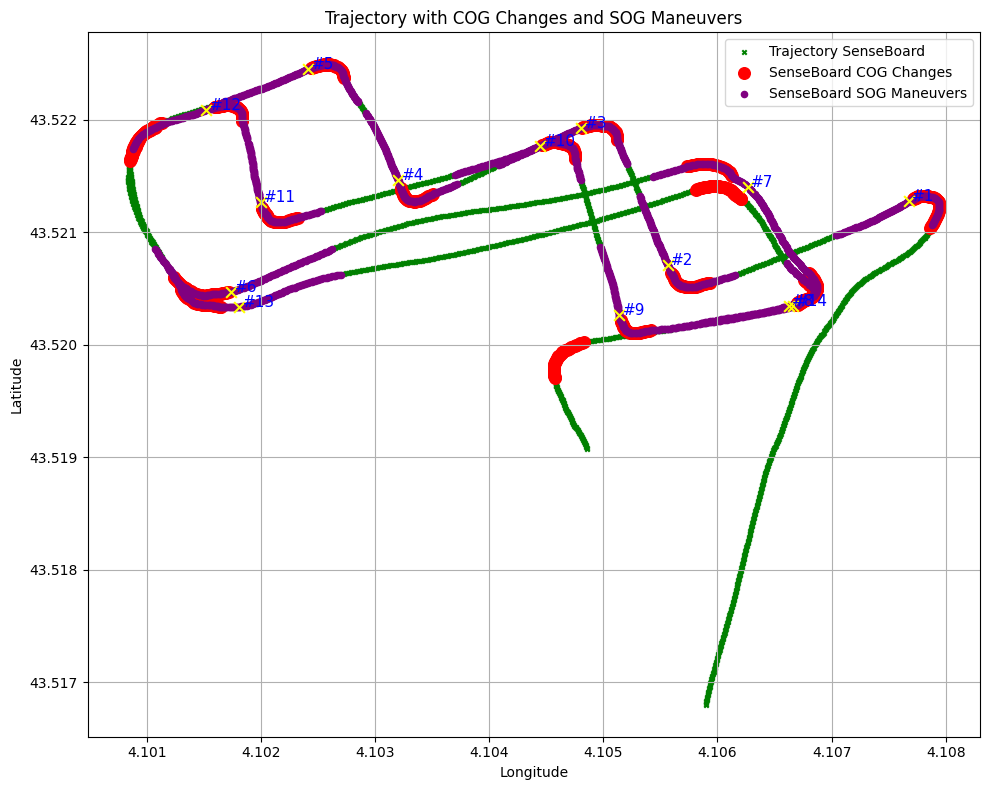

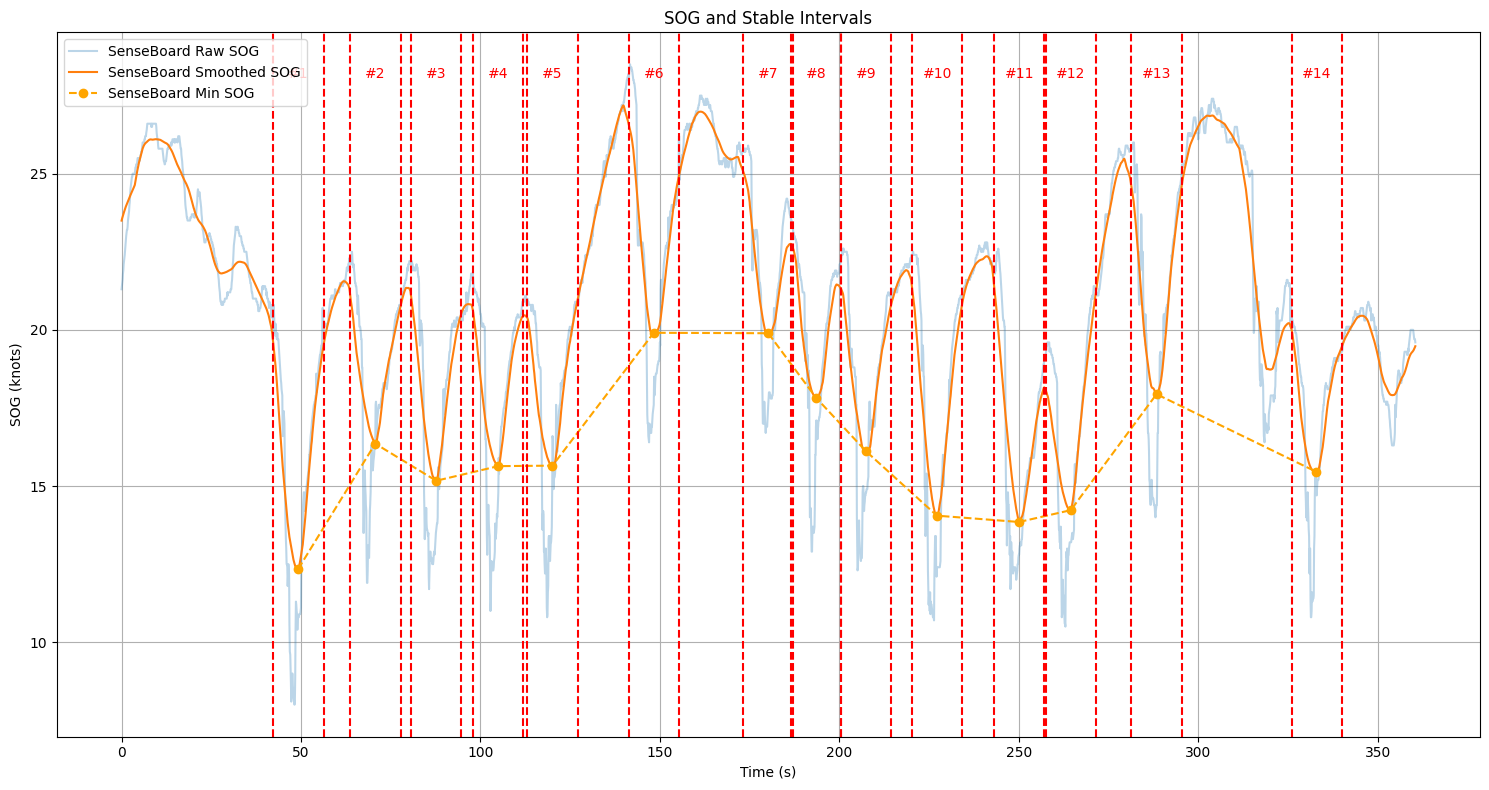

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run4


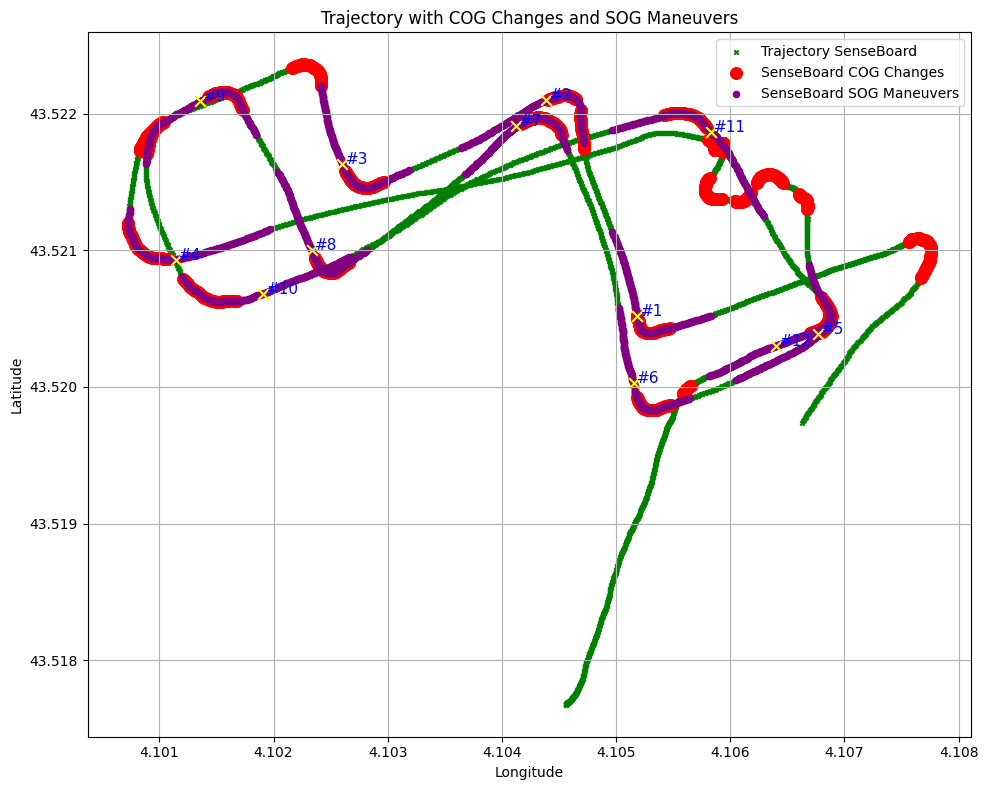

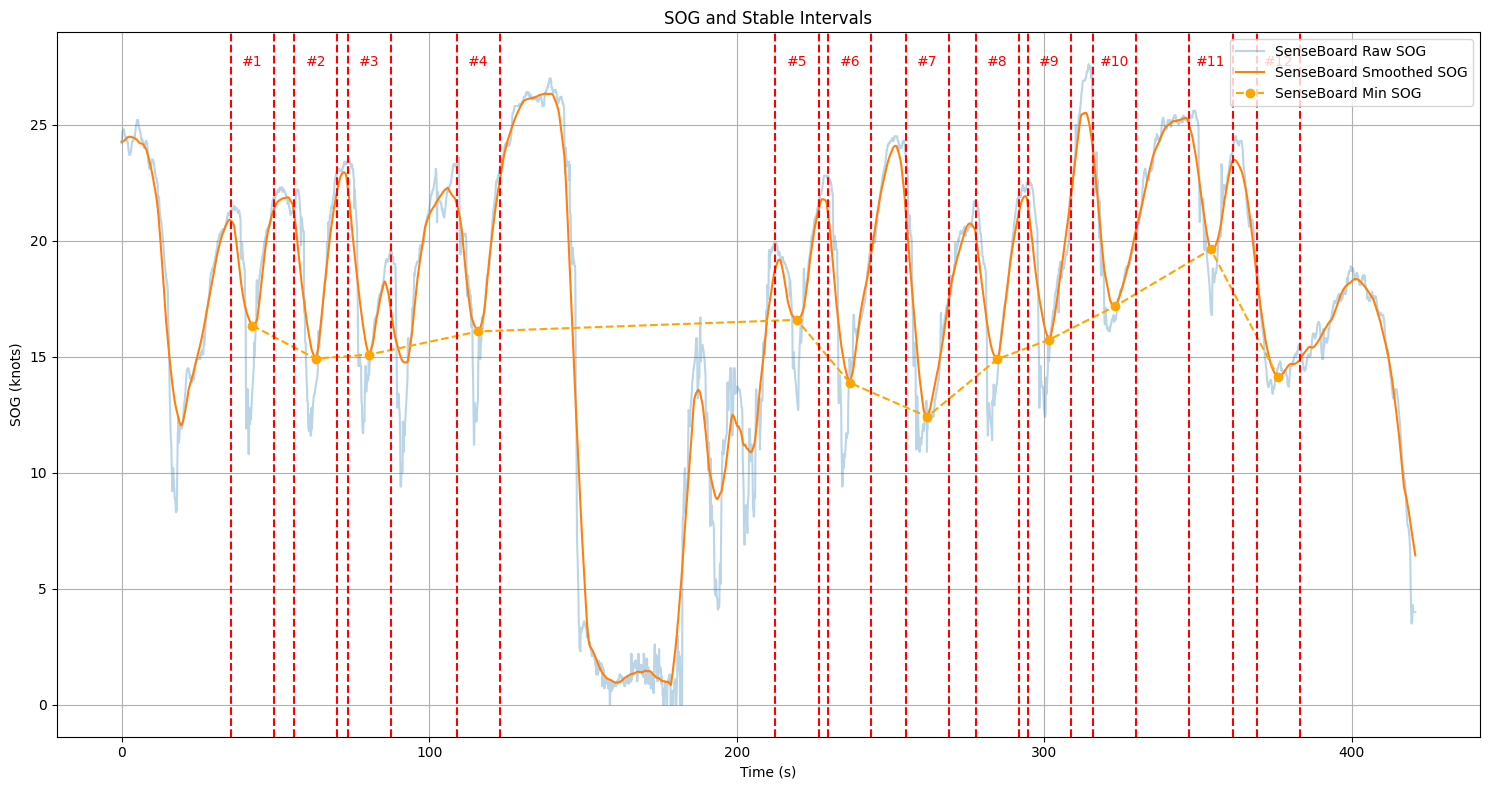

✔ Analyse réussie, nombre d'intervalles : 12
Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run5


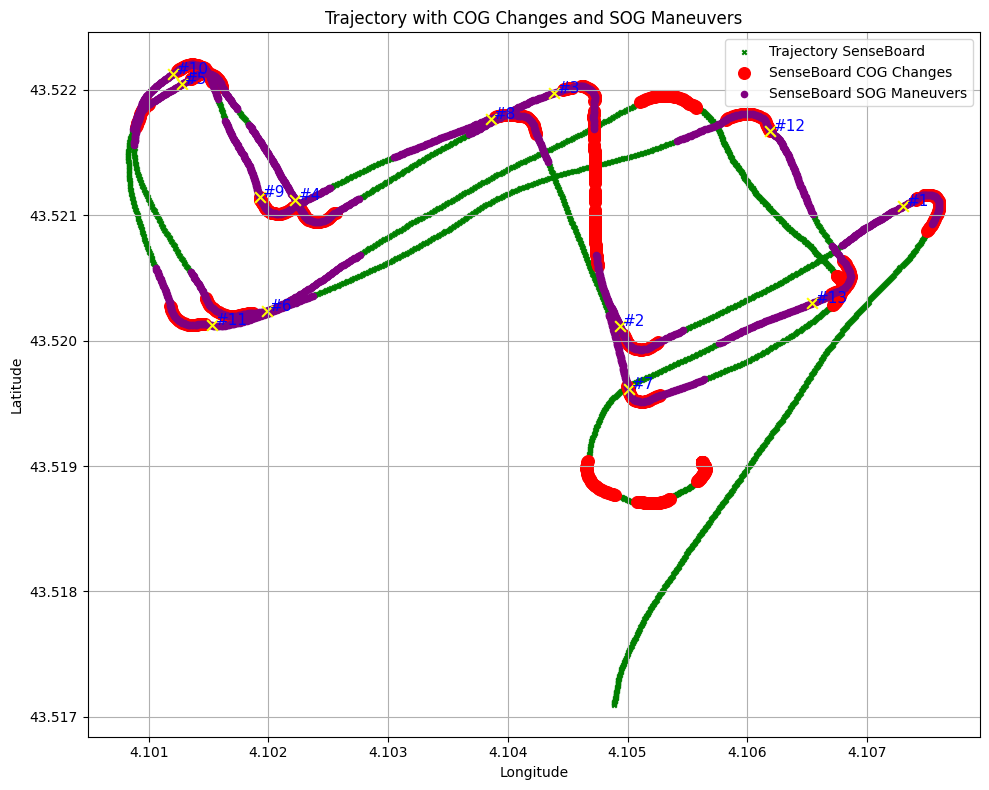

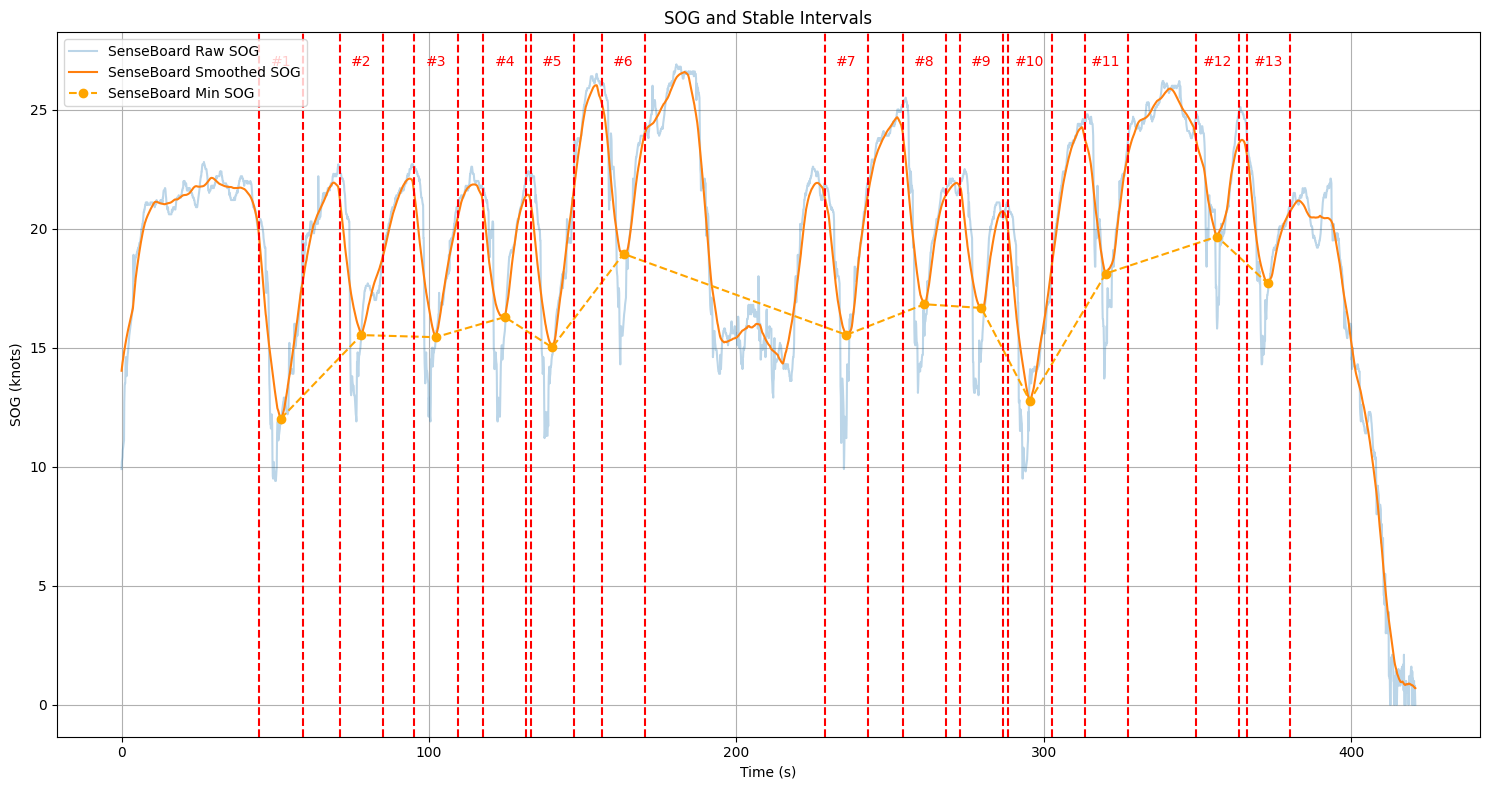

✔ Analyse réussie, nombre d'intervalles : 13
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run1


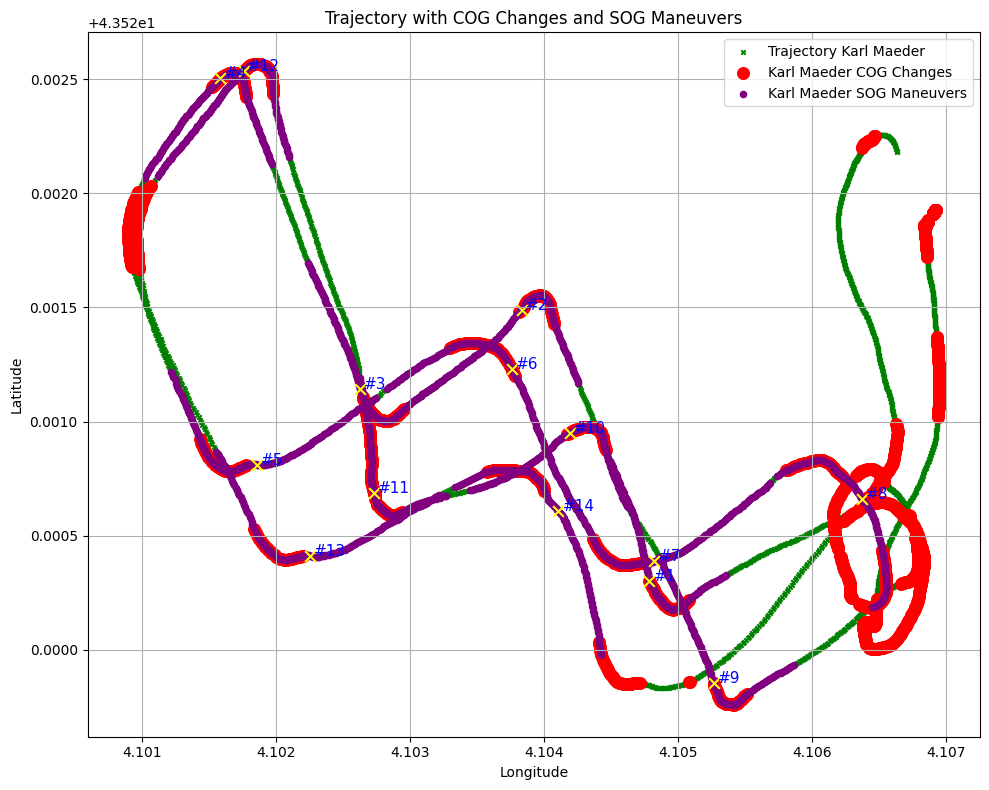

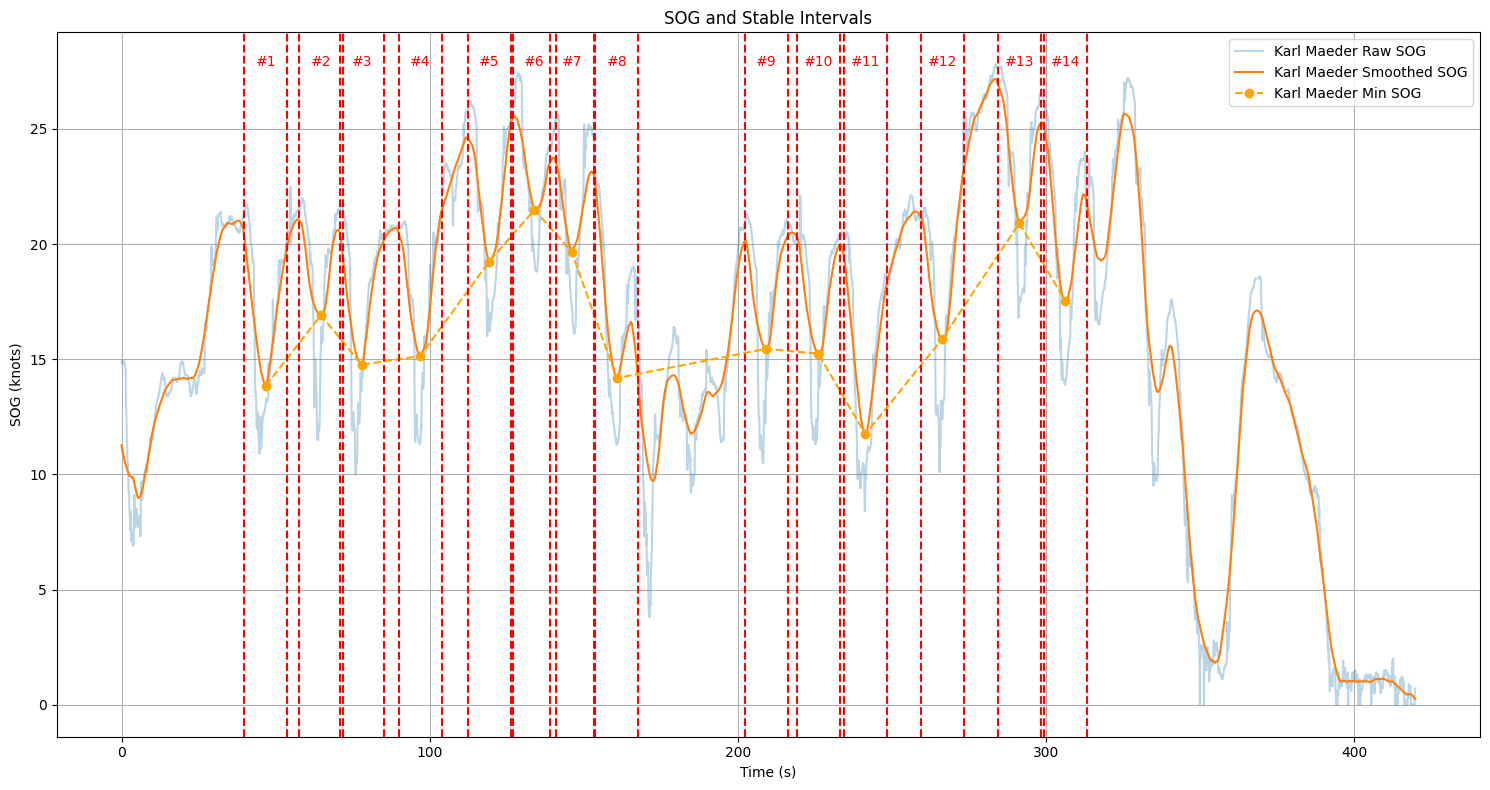

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run2


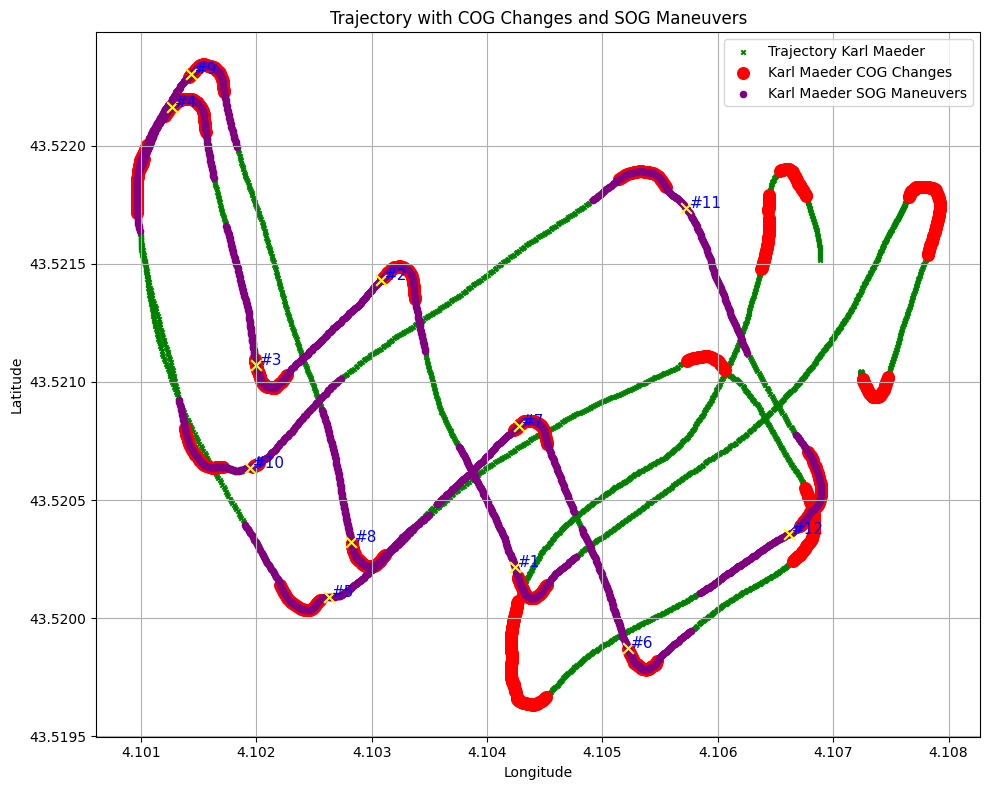

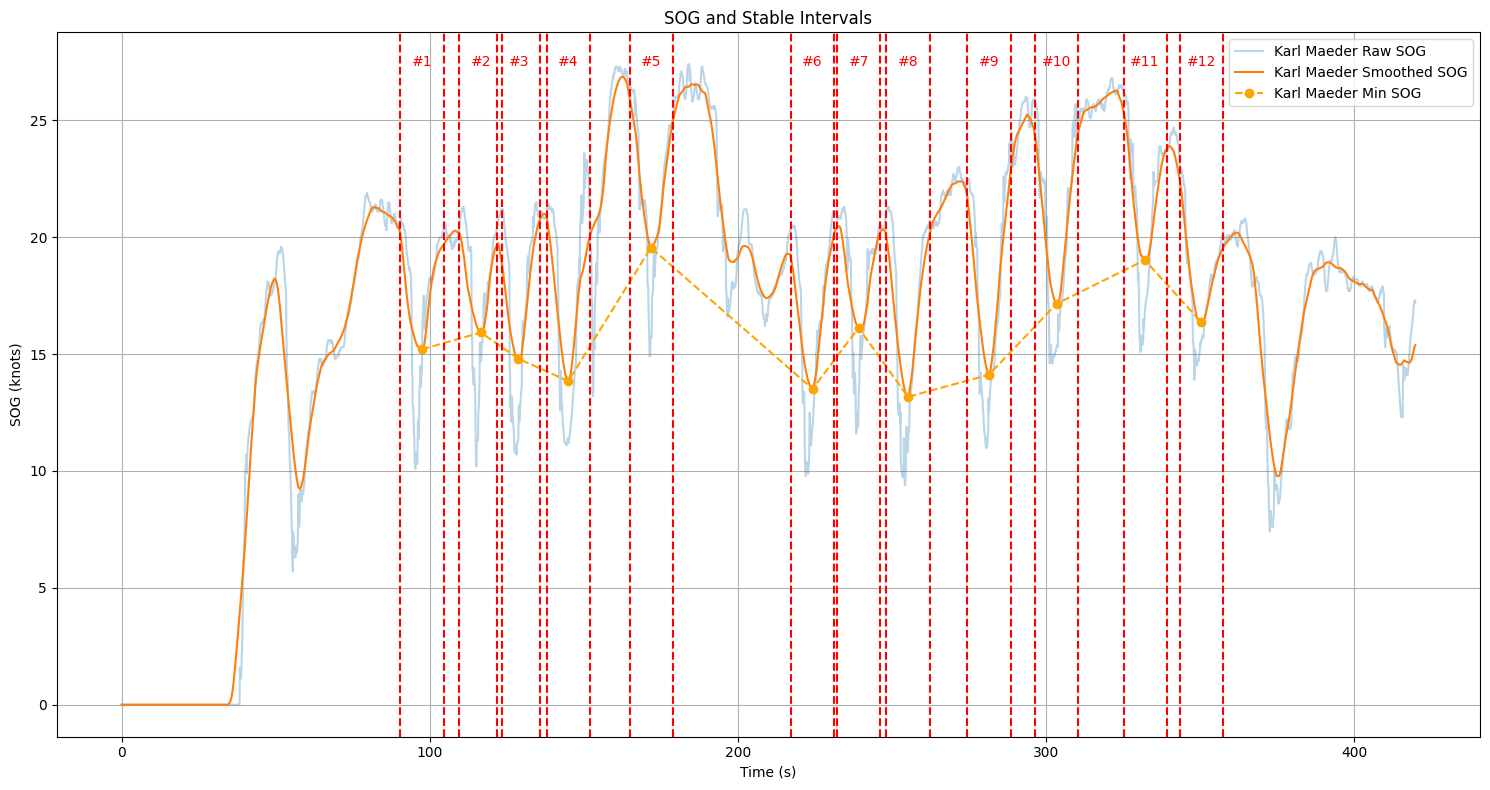

✔ Analyse réussie, nombre d'intervalles : 12
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run3


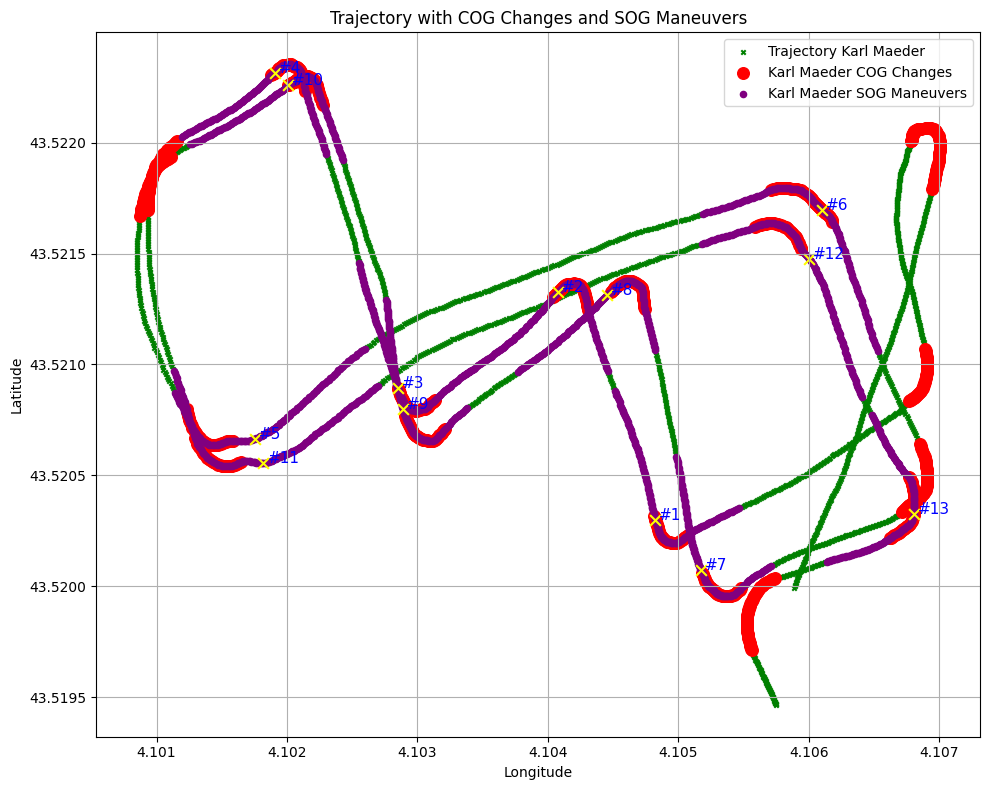

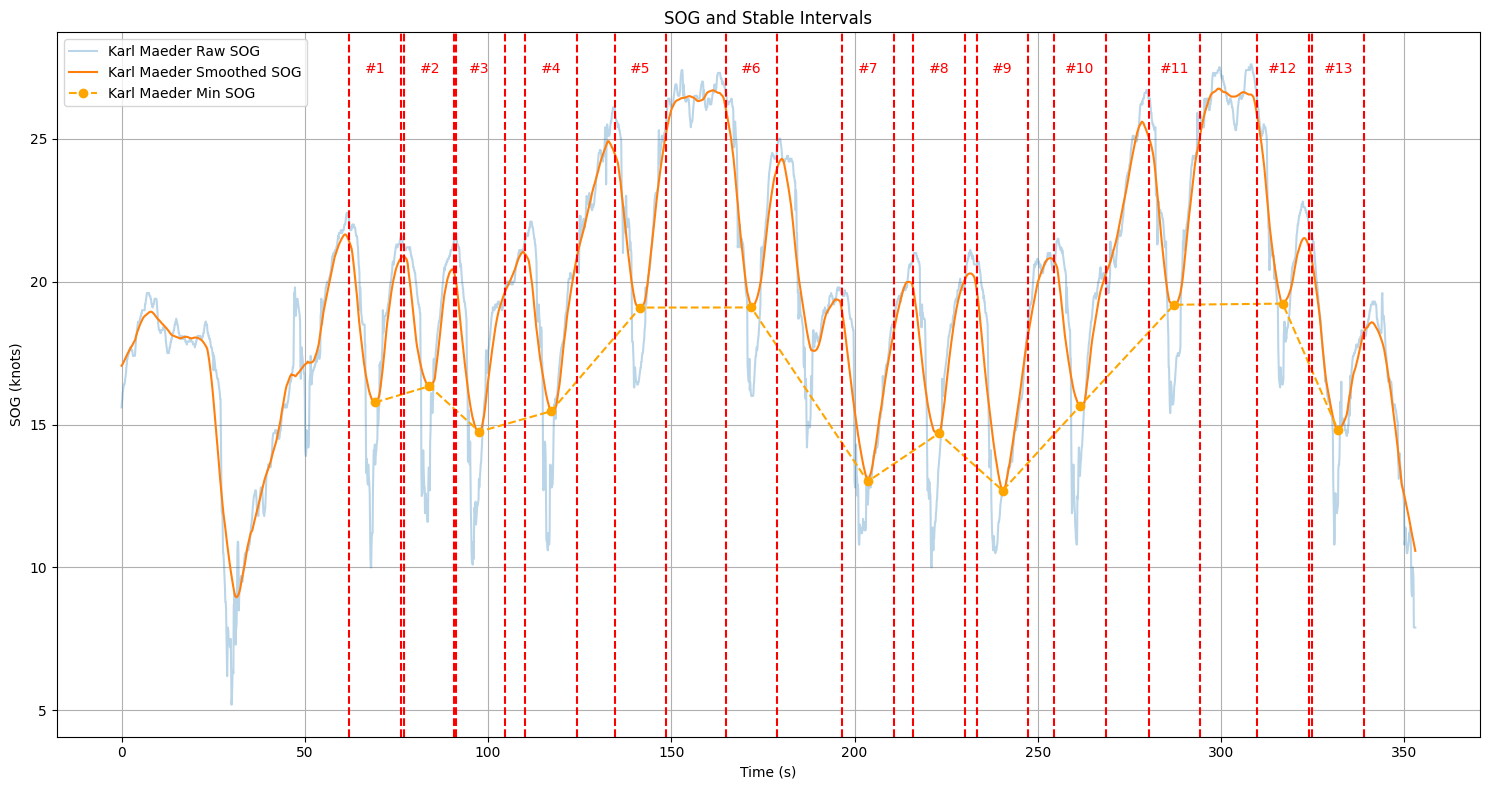

✔ Analyse réussie, nombre d'intervalles : 13
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run4


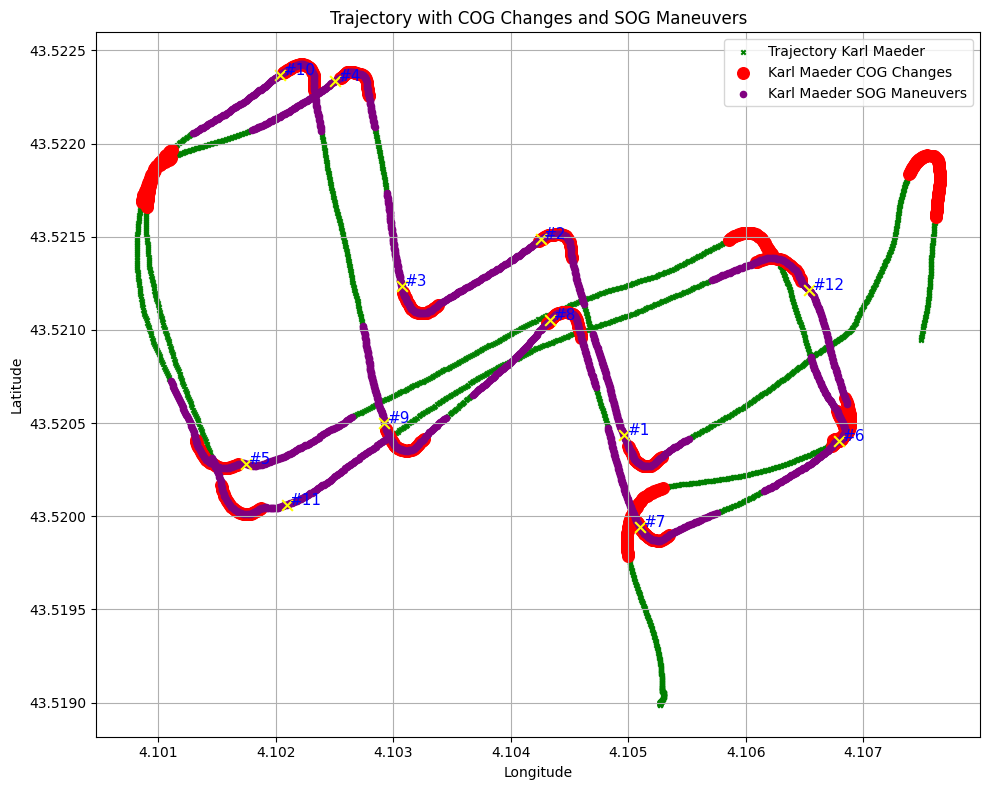

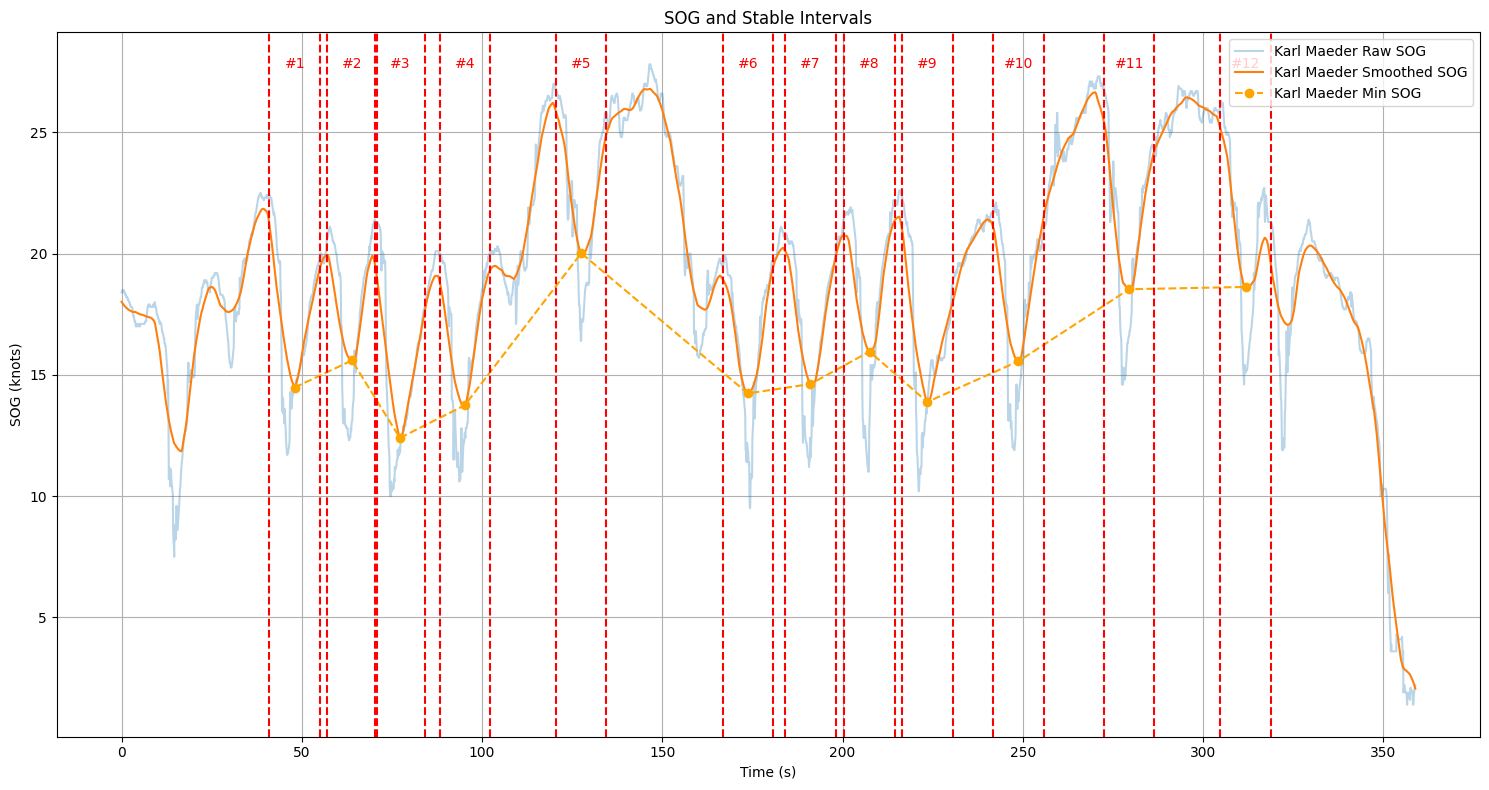

✔ Analyse réussie, nombre d'intervalles : 12
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run5


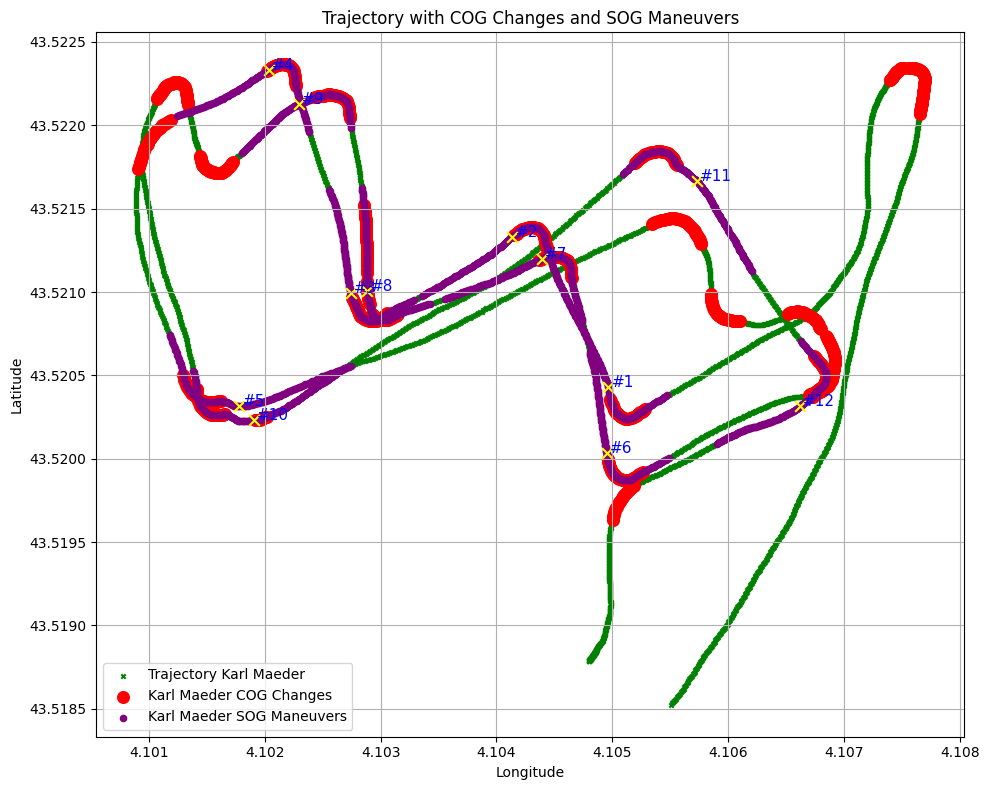

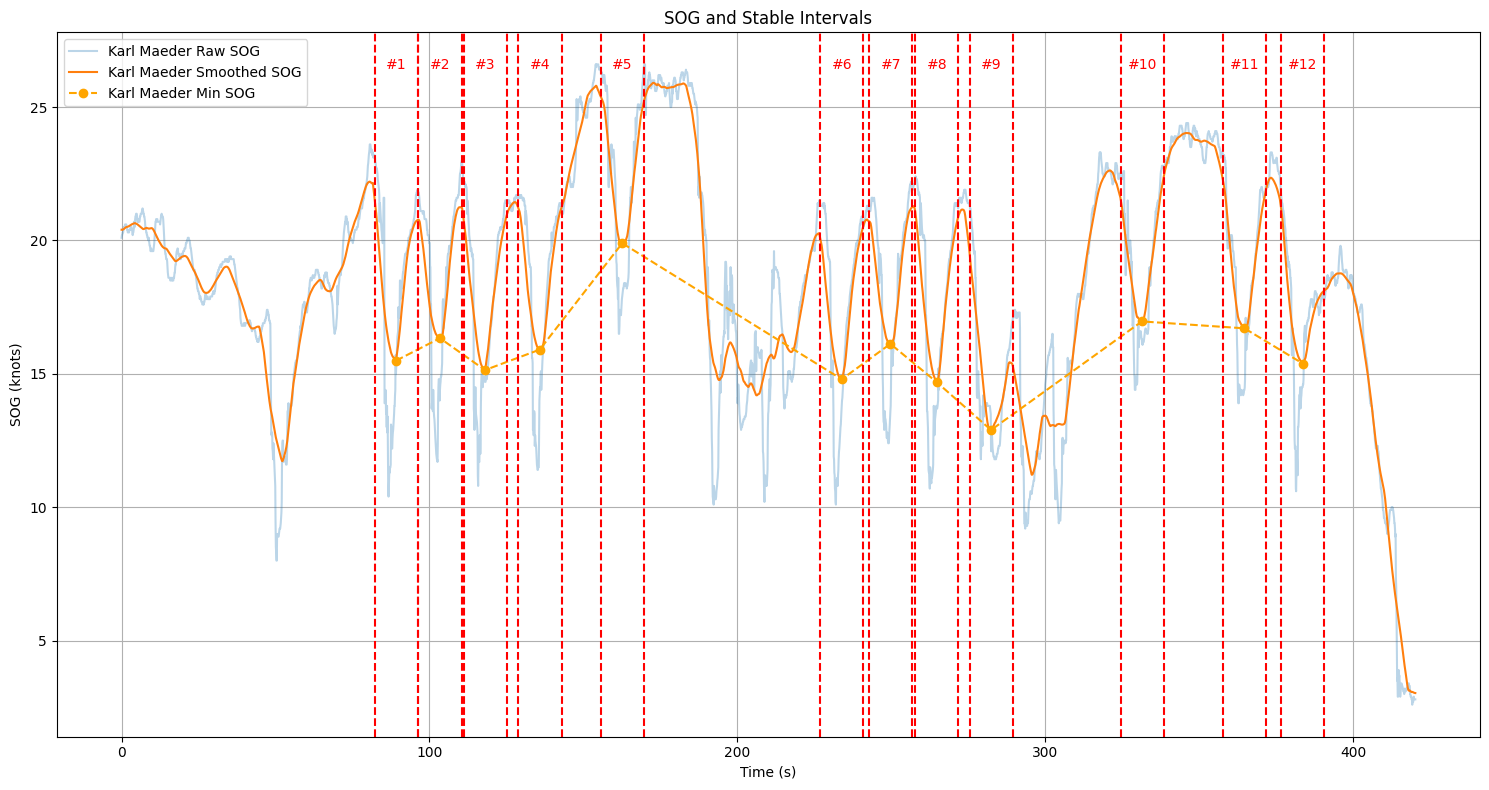

✔ Analyse réussie, nombre d'intervalles : 12
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run6


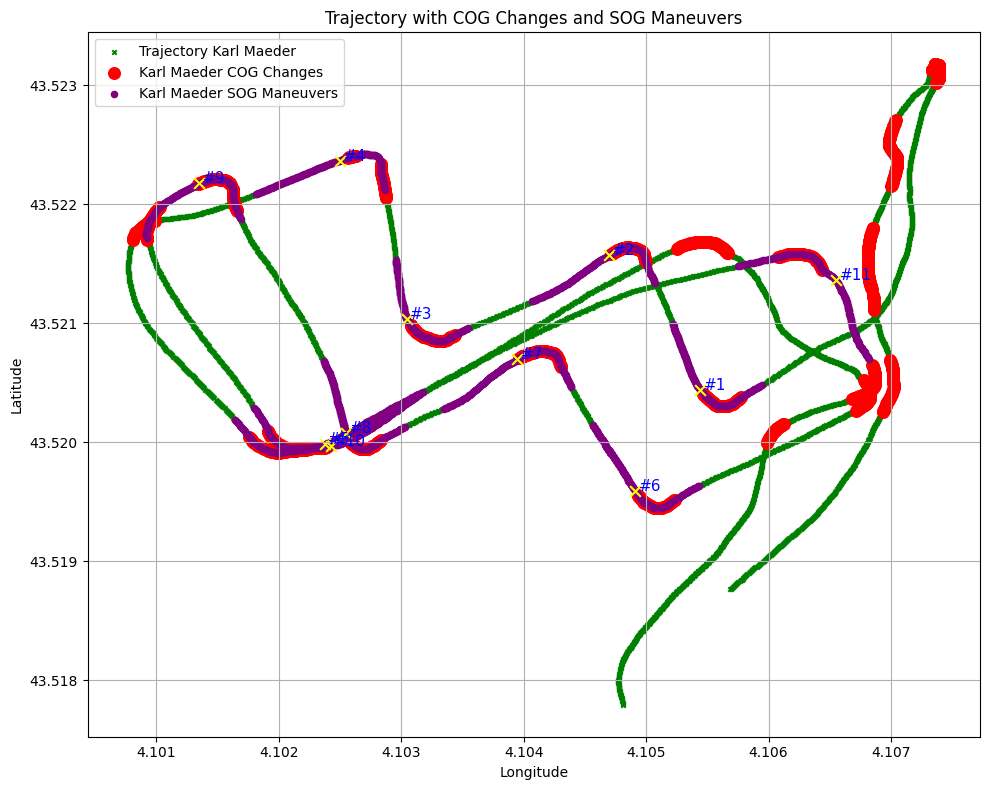

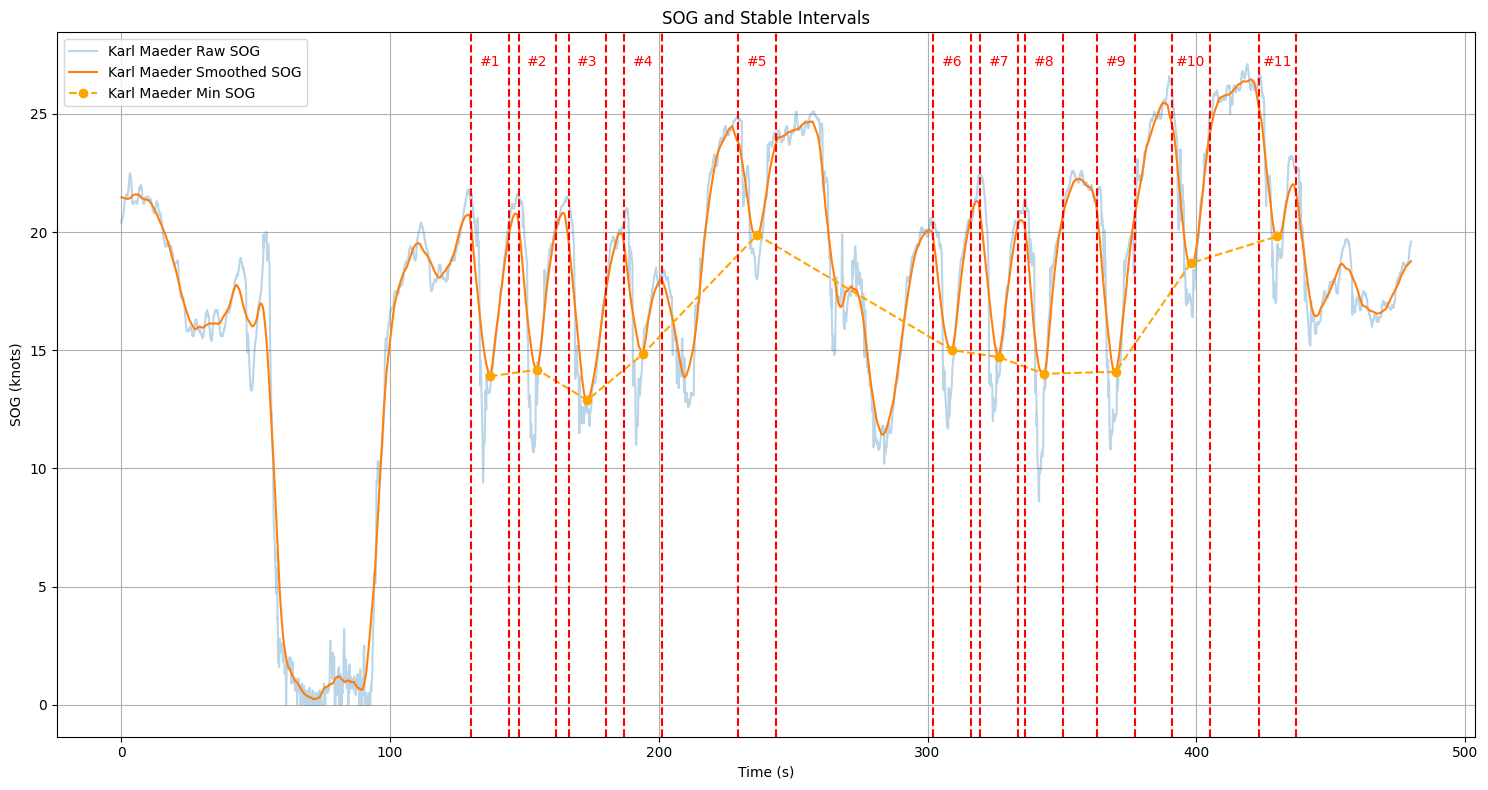

✔ Analyse réussie, nombre d'intervalles : 11
Analyse: Gian Stragiotti.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run1


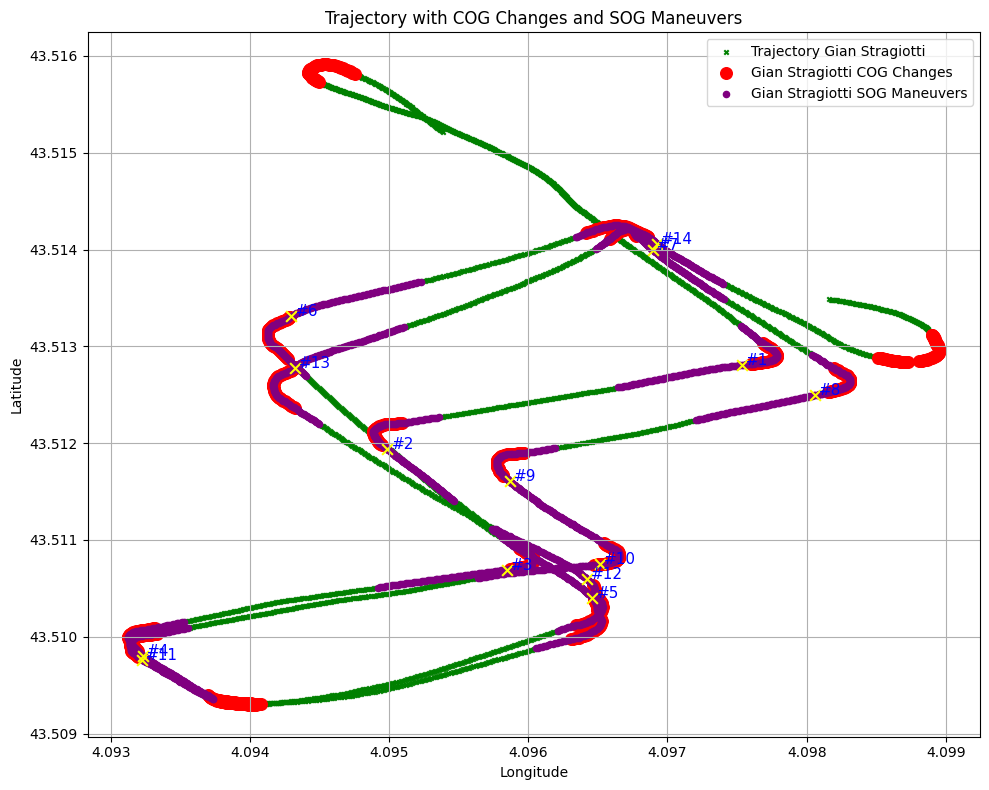

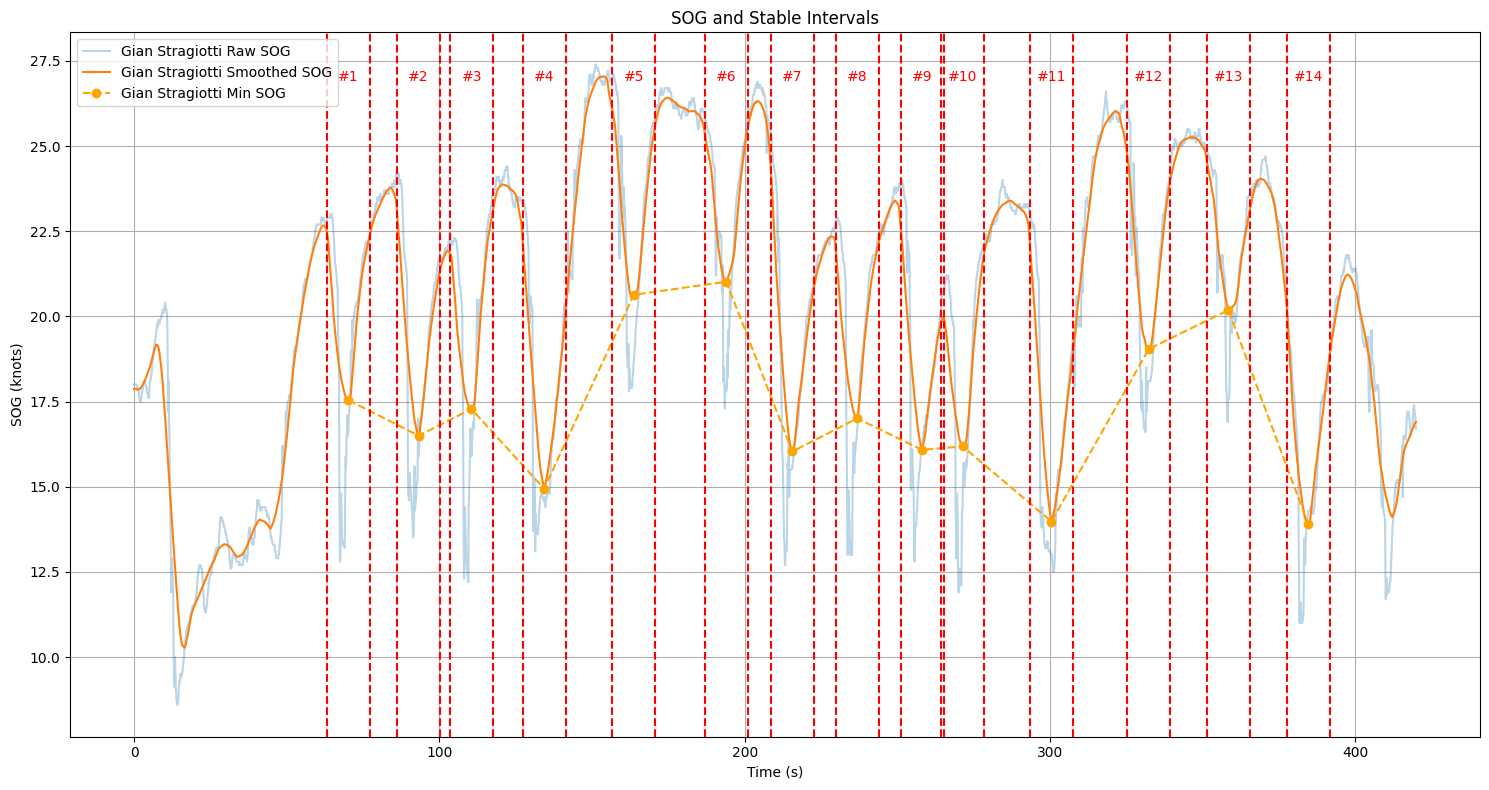

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: Gian Stragiotti.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run2


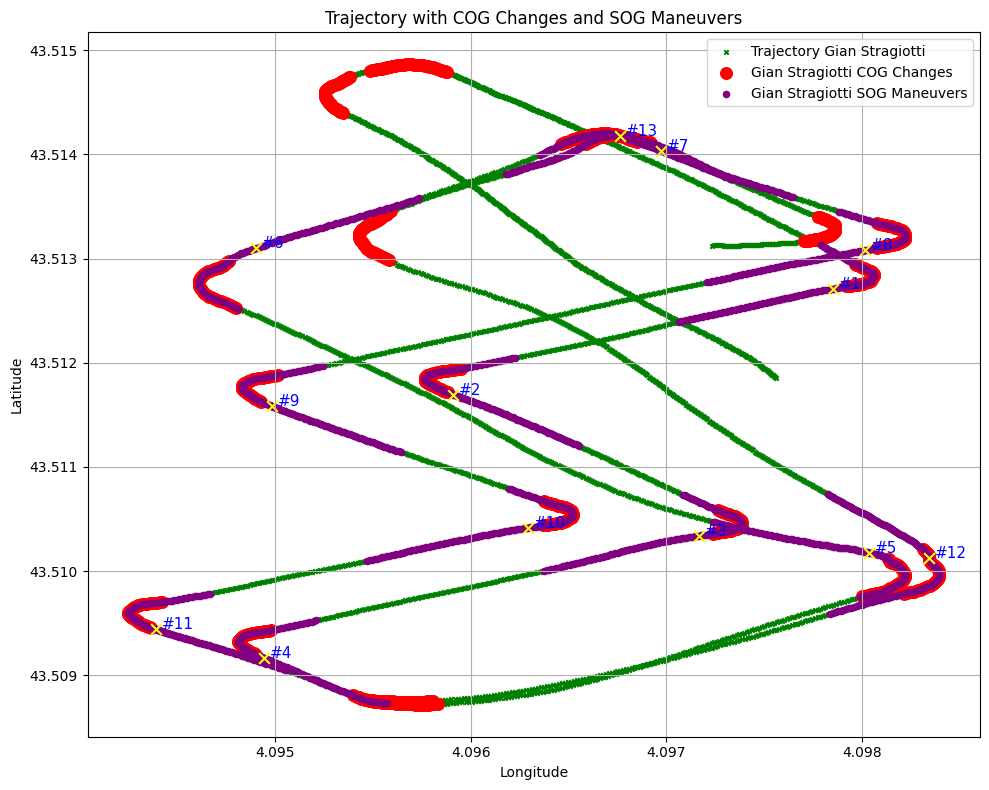

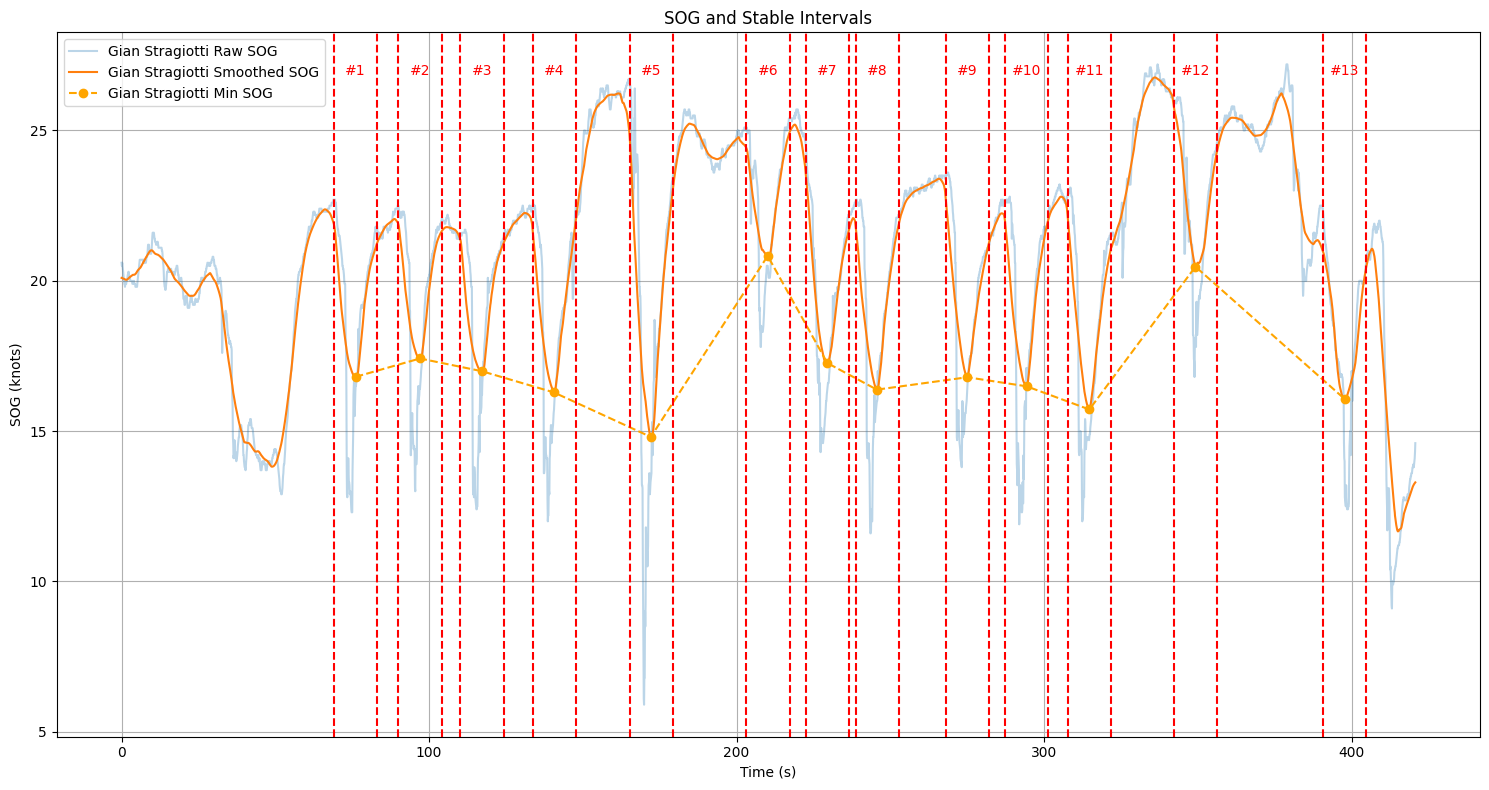

✔ Analyse réussie, nombre d'intervalles : 13
Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run3


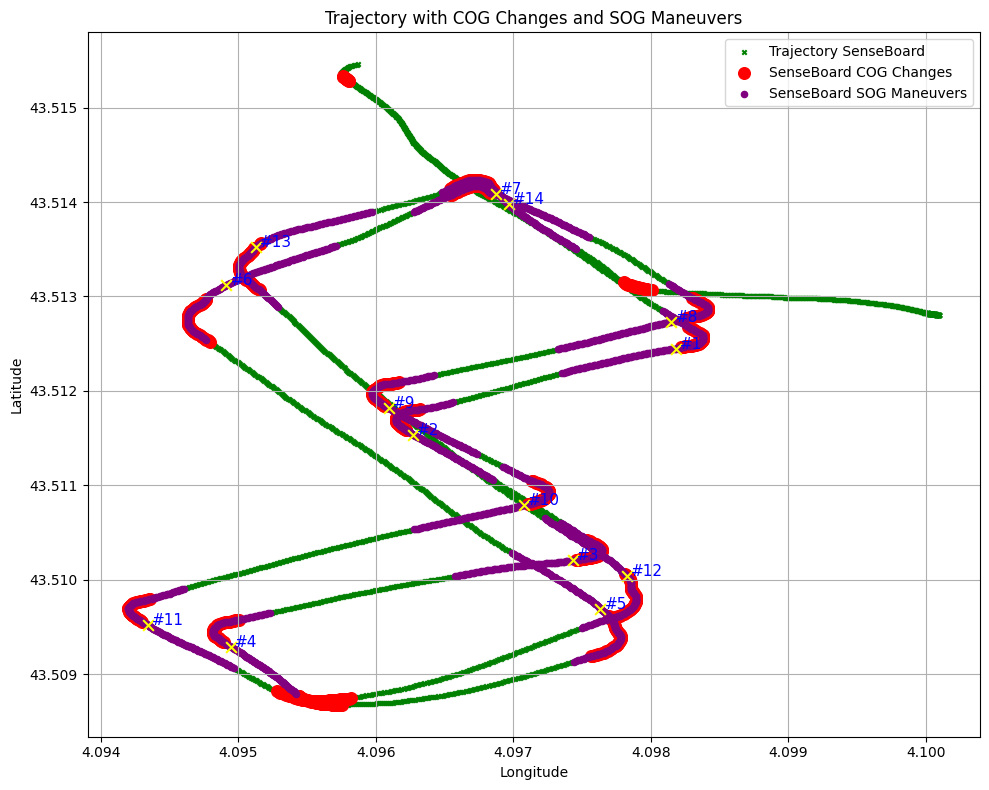

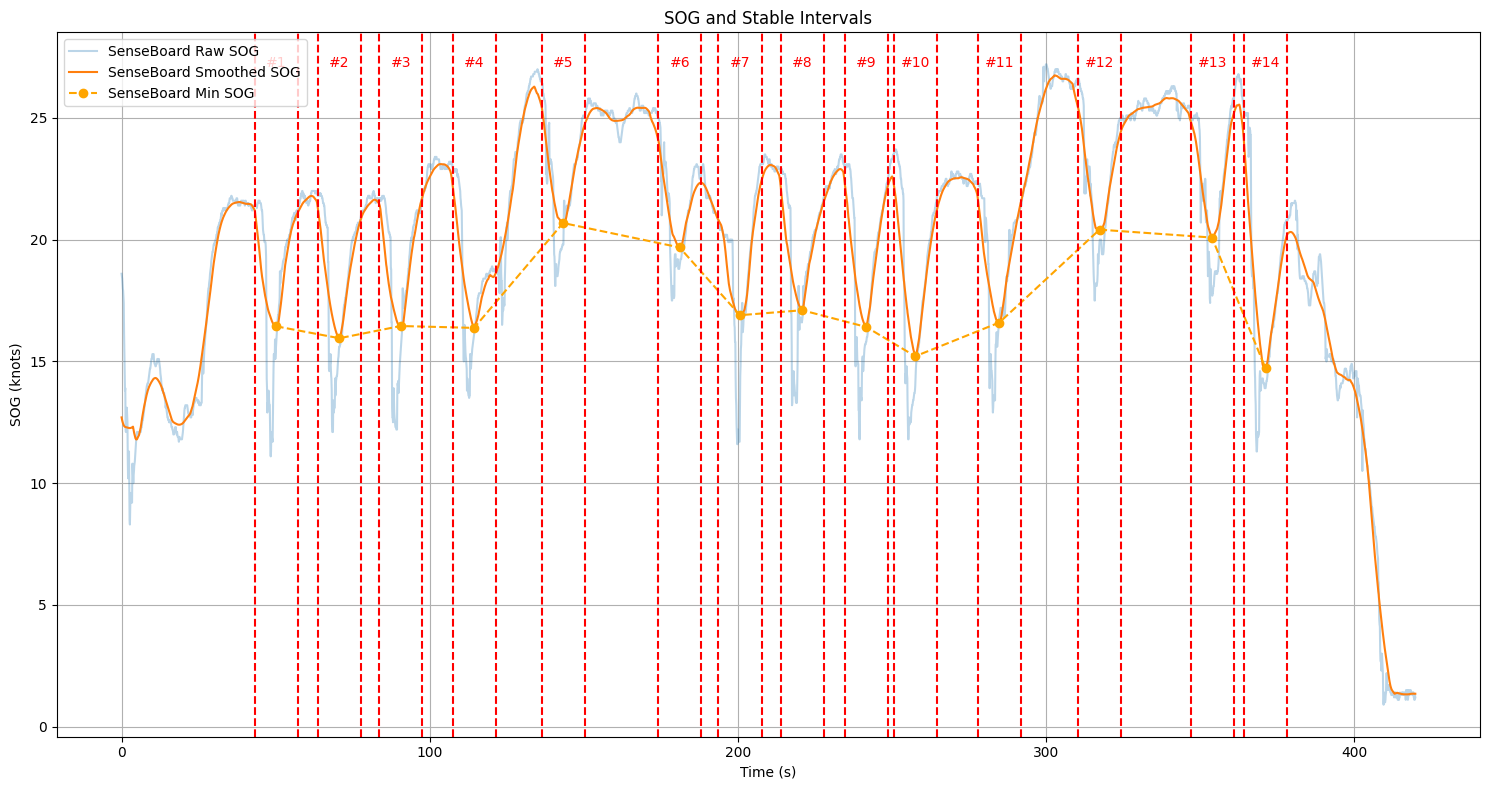

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run4


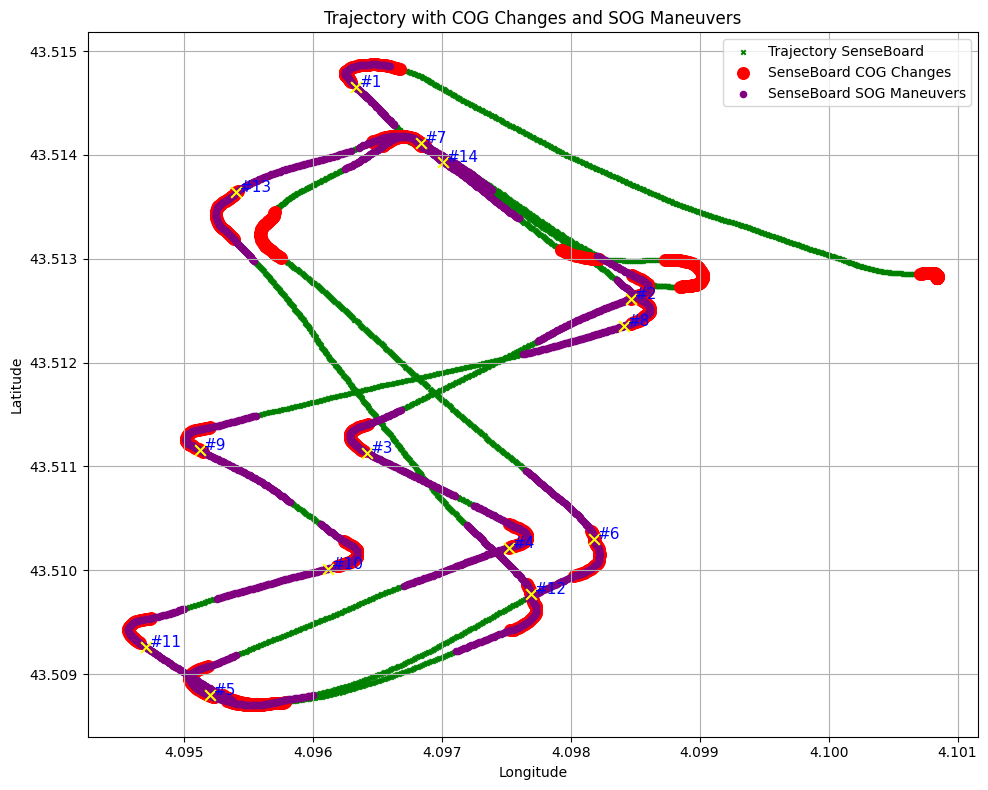

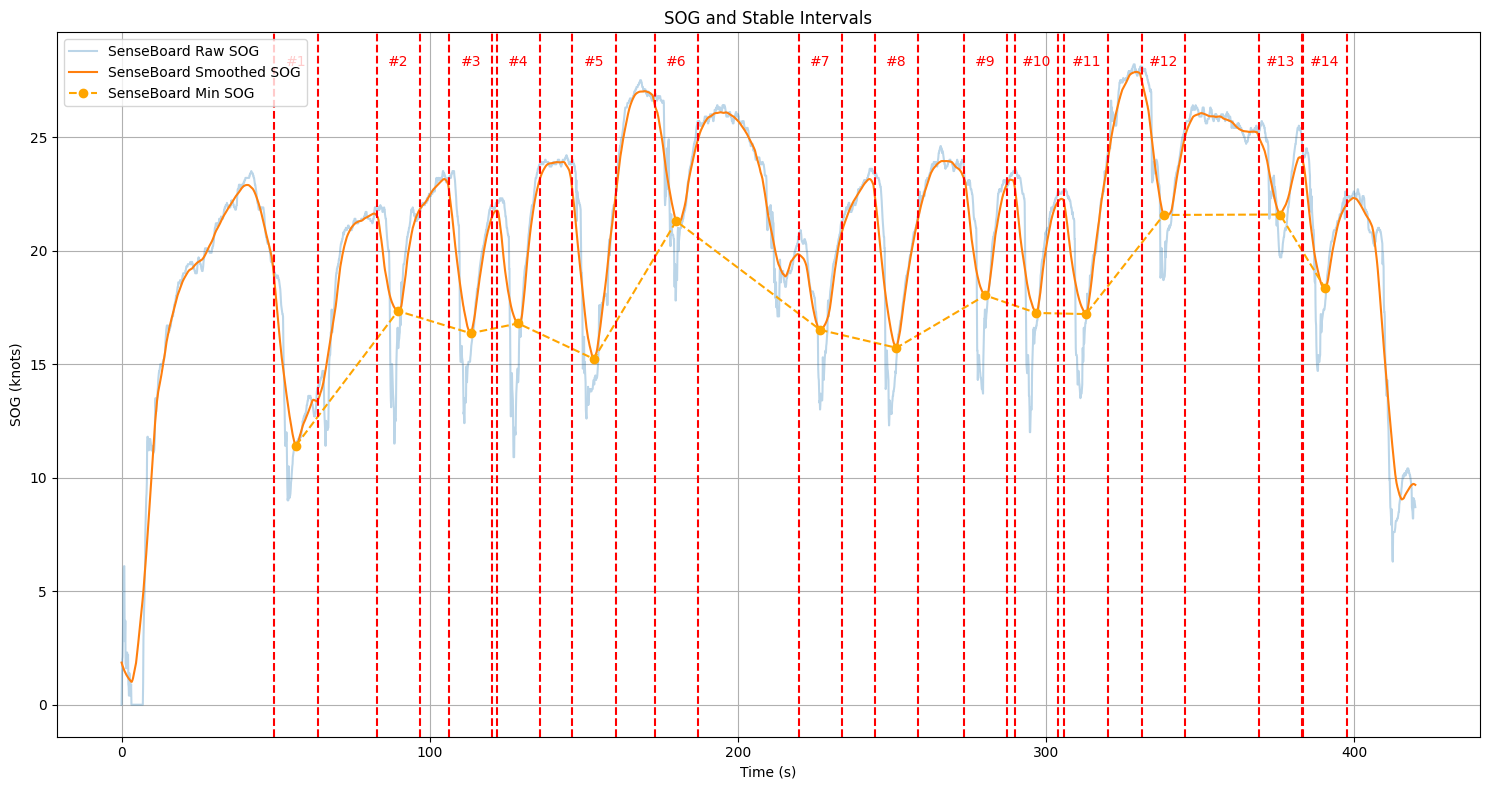

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run5


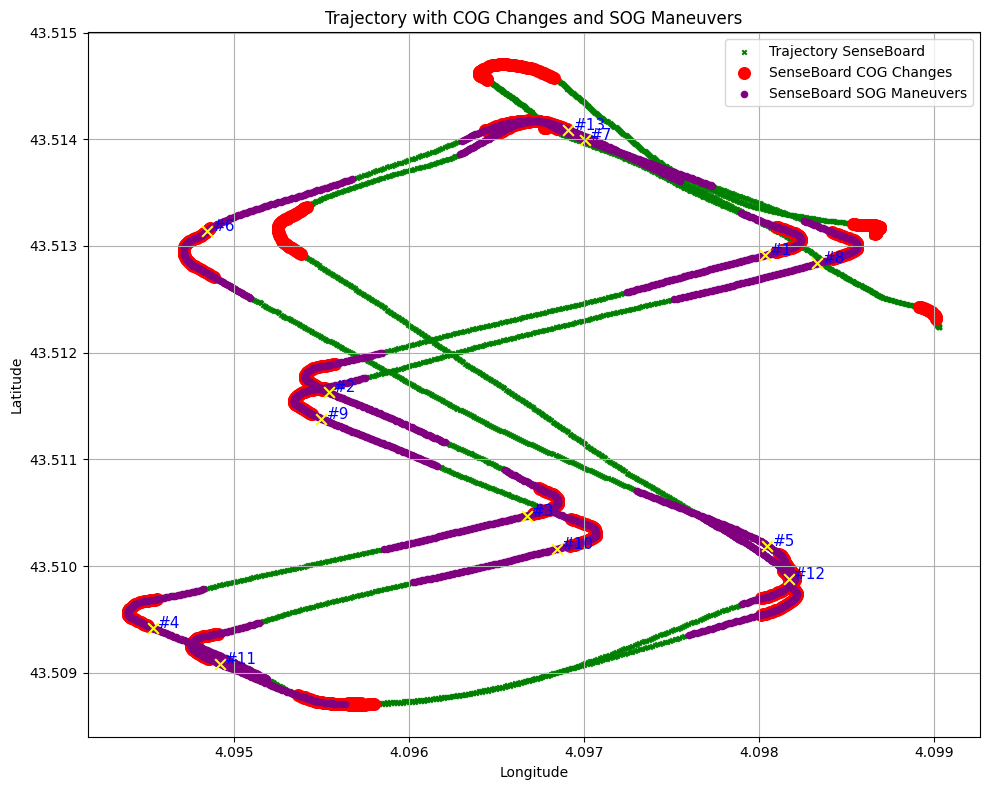

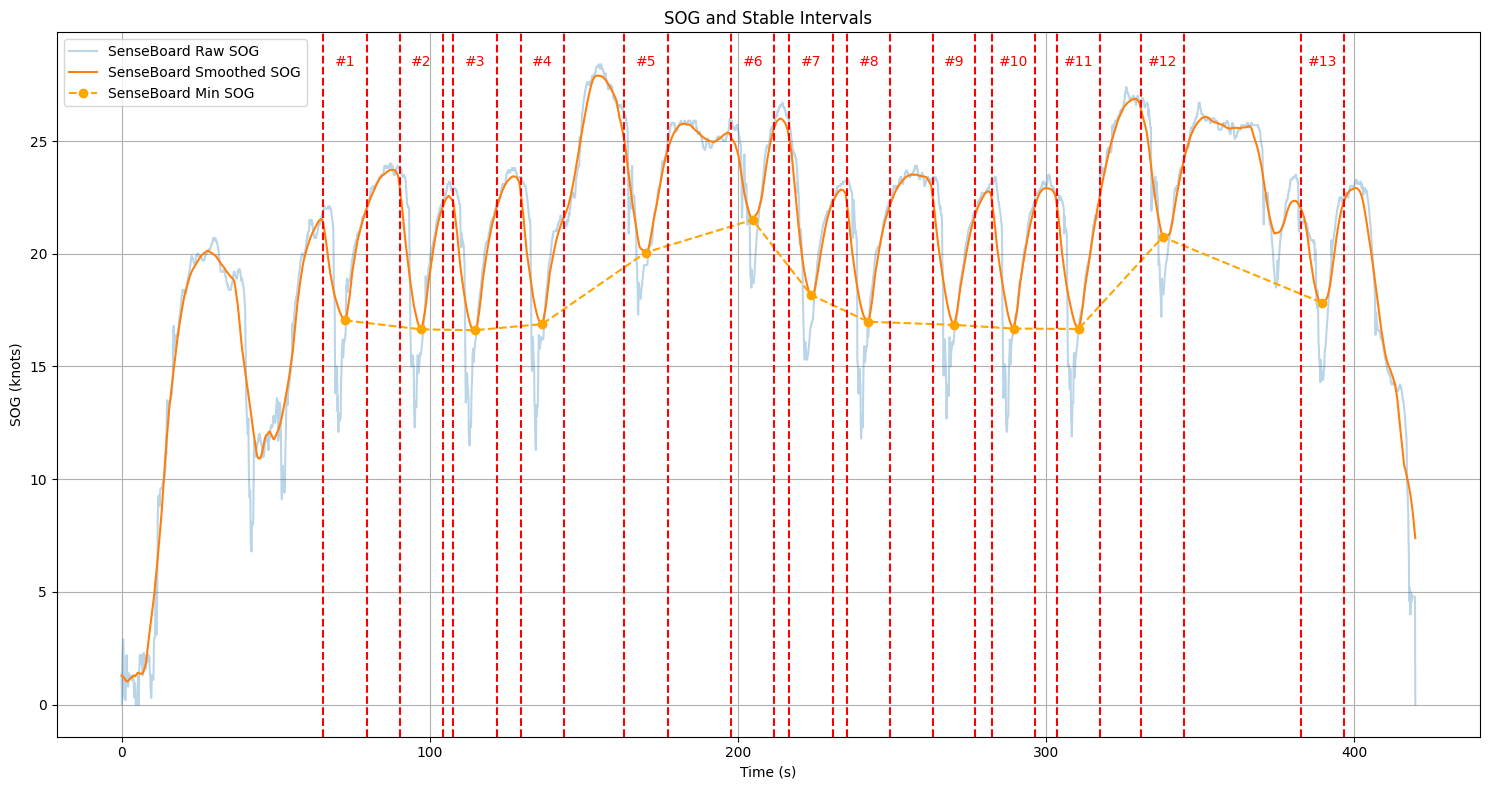

✔ Analyse réussie, nombre d'intervalles : 13
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run1


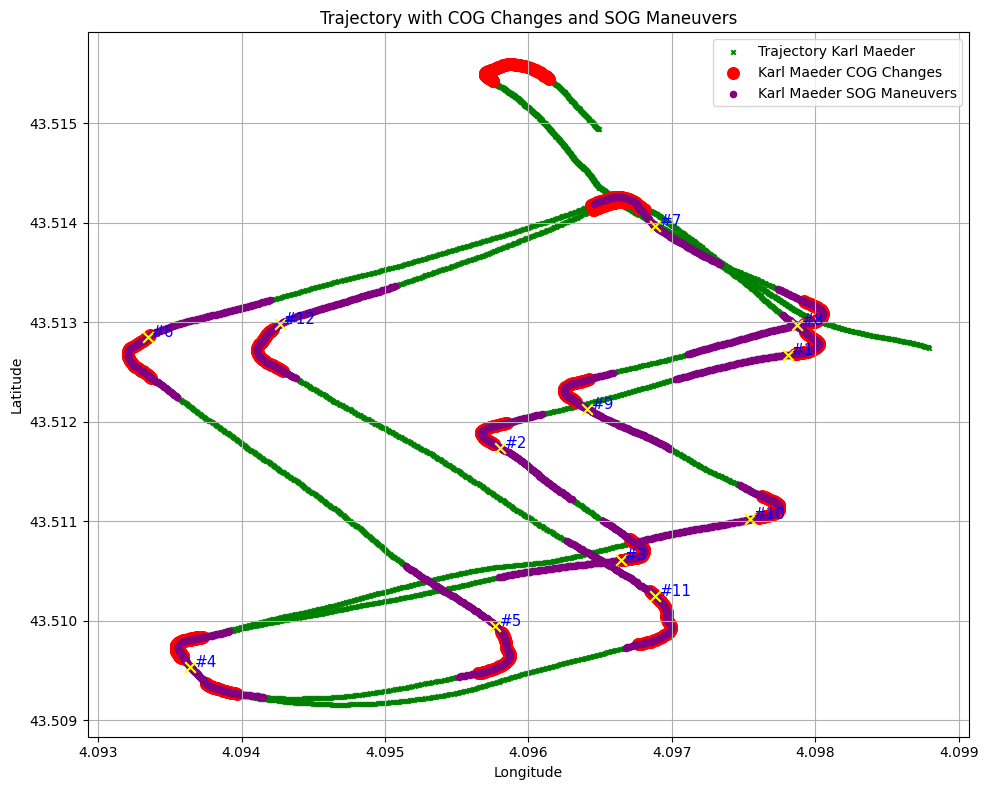

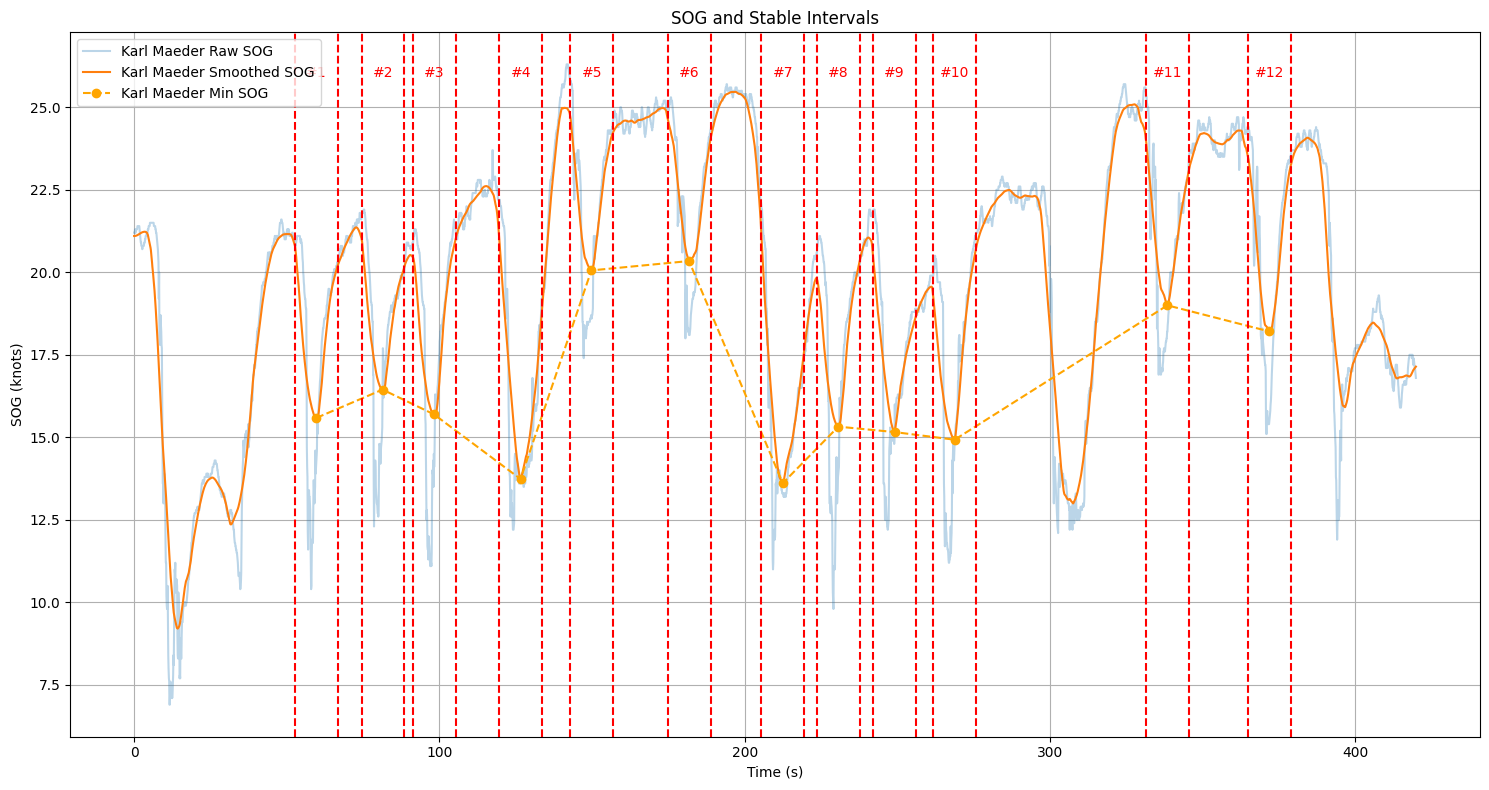

✔ Analyse réussie, nombre d'intervalles : 12
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run2


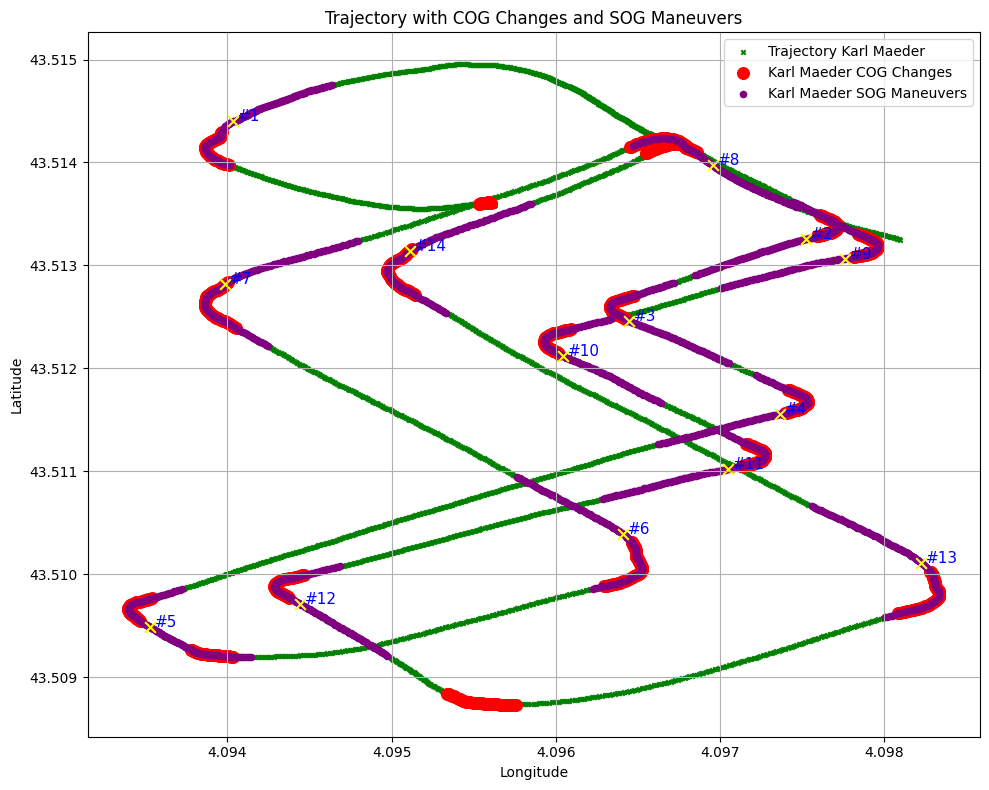

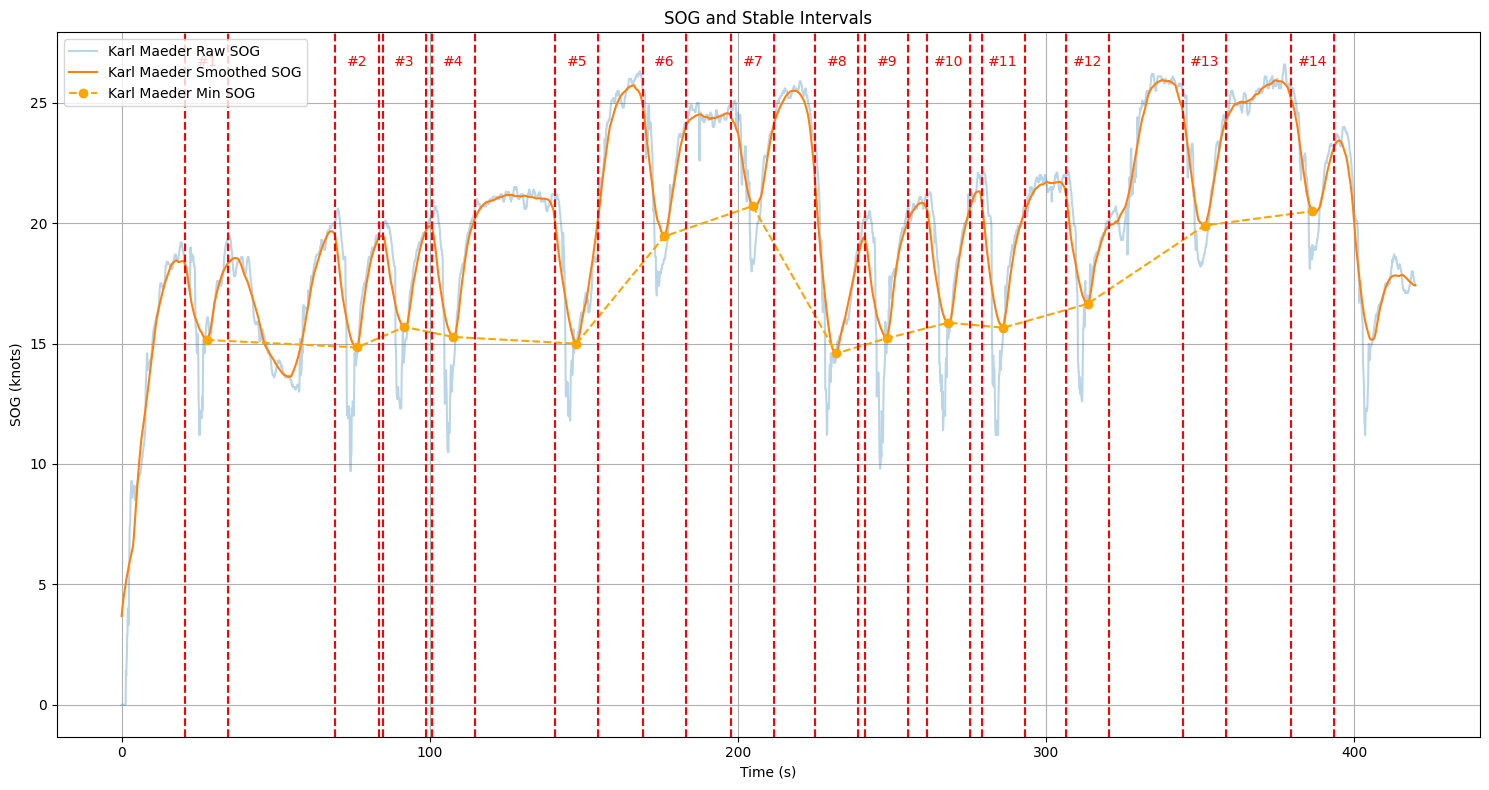

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run3


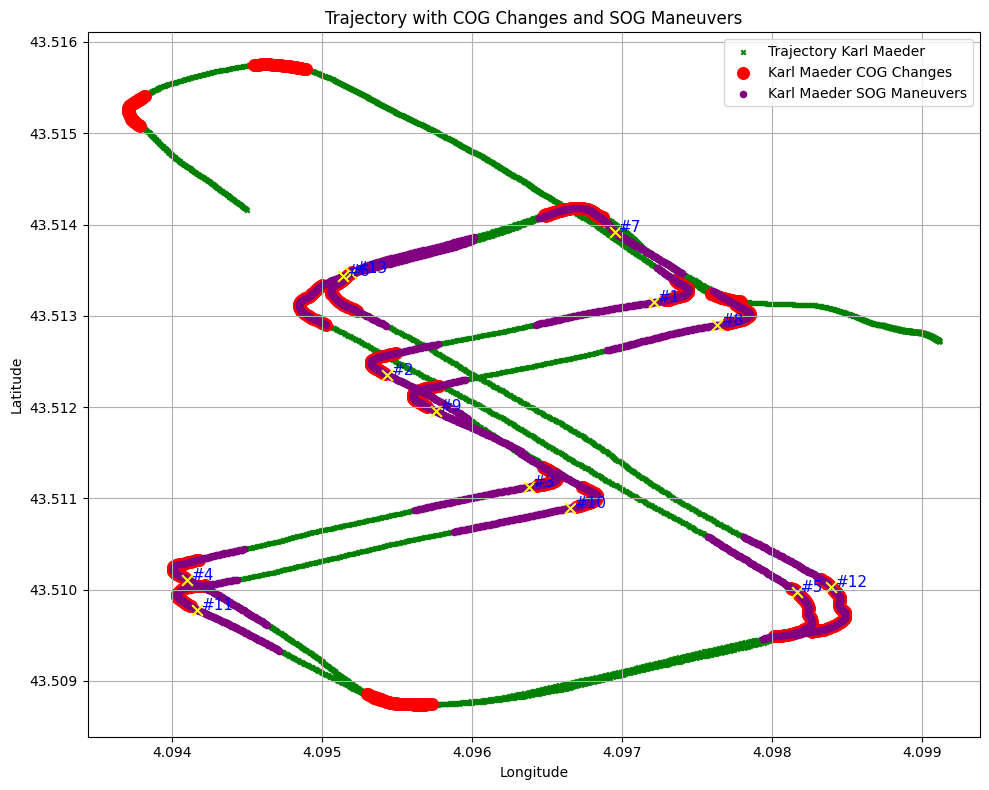

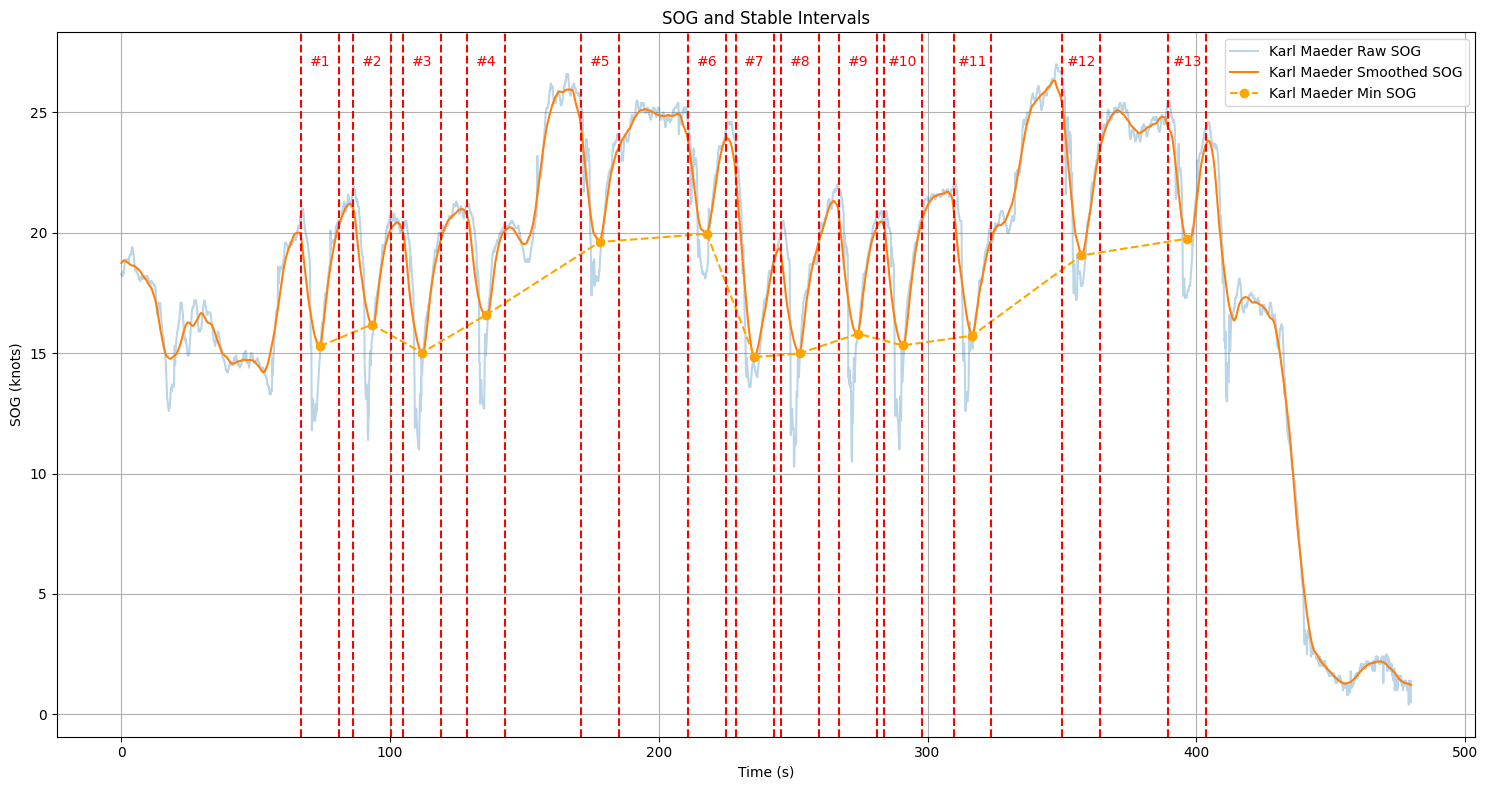

✔ Analyse réussie, nombre d'intervalles : 13
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run4


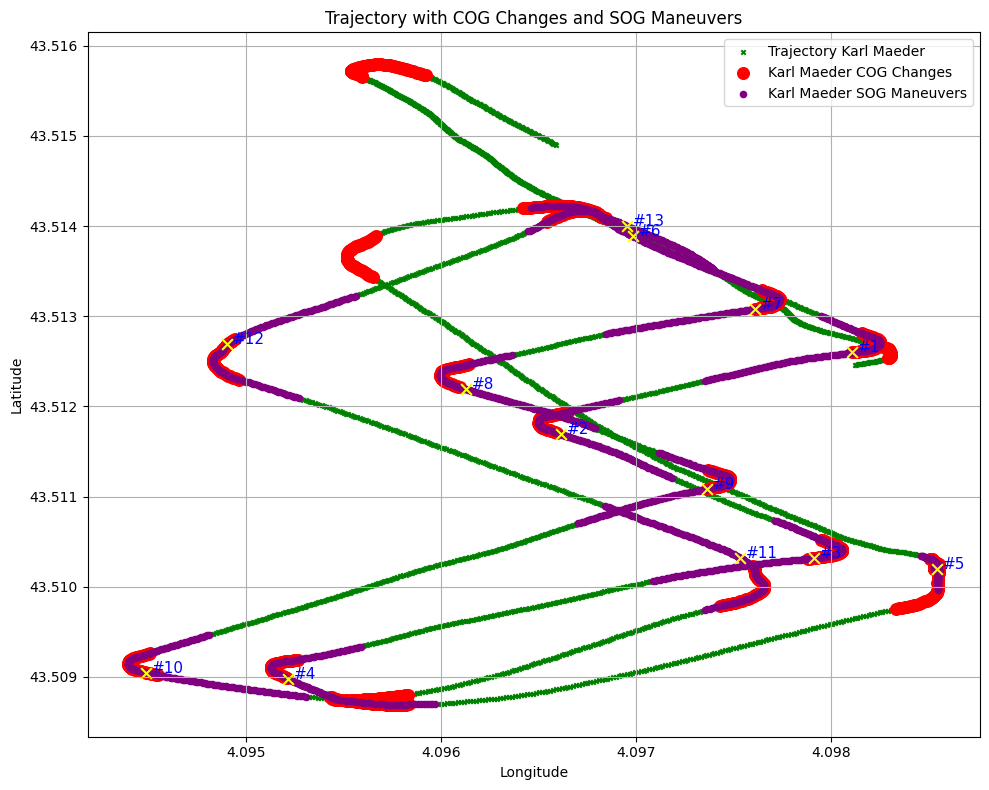

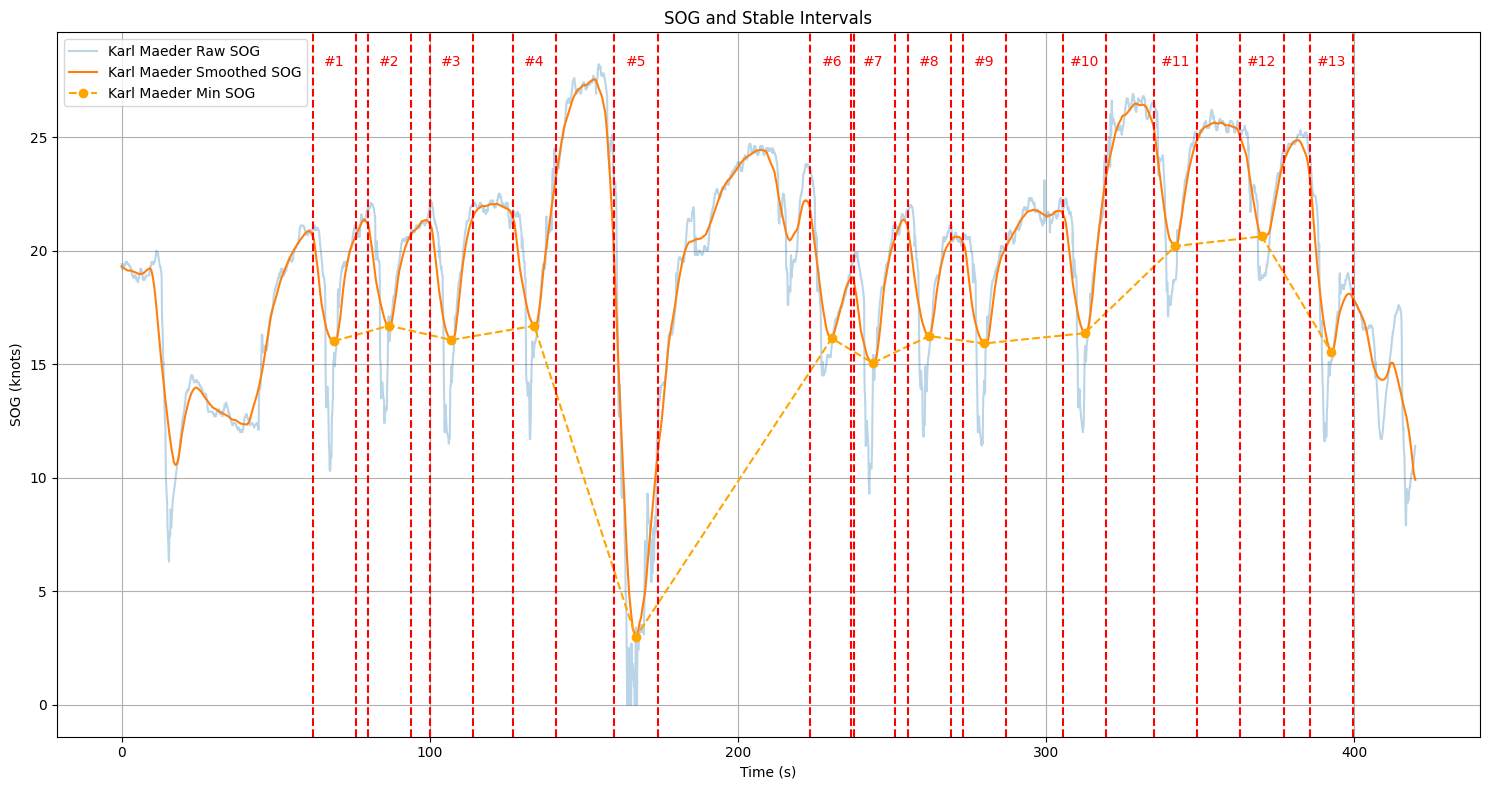

✔ Analyse réussie, nombre d'intervalles : 13
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run5


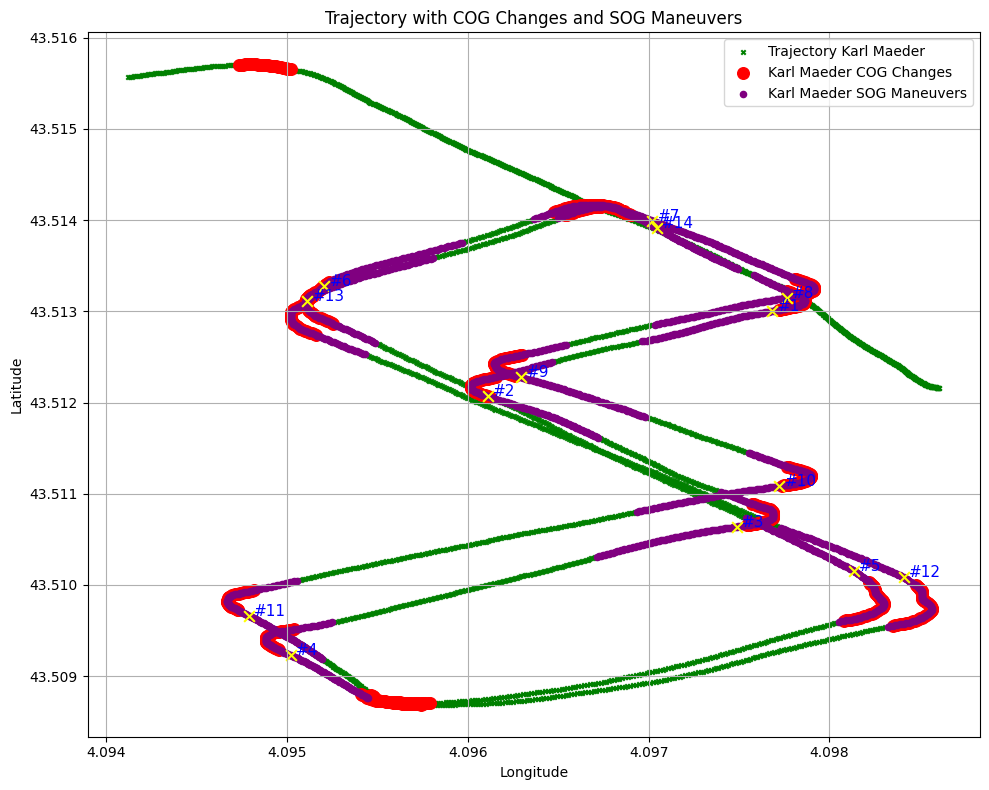

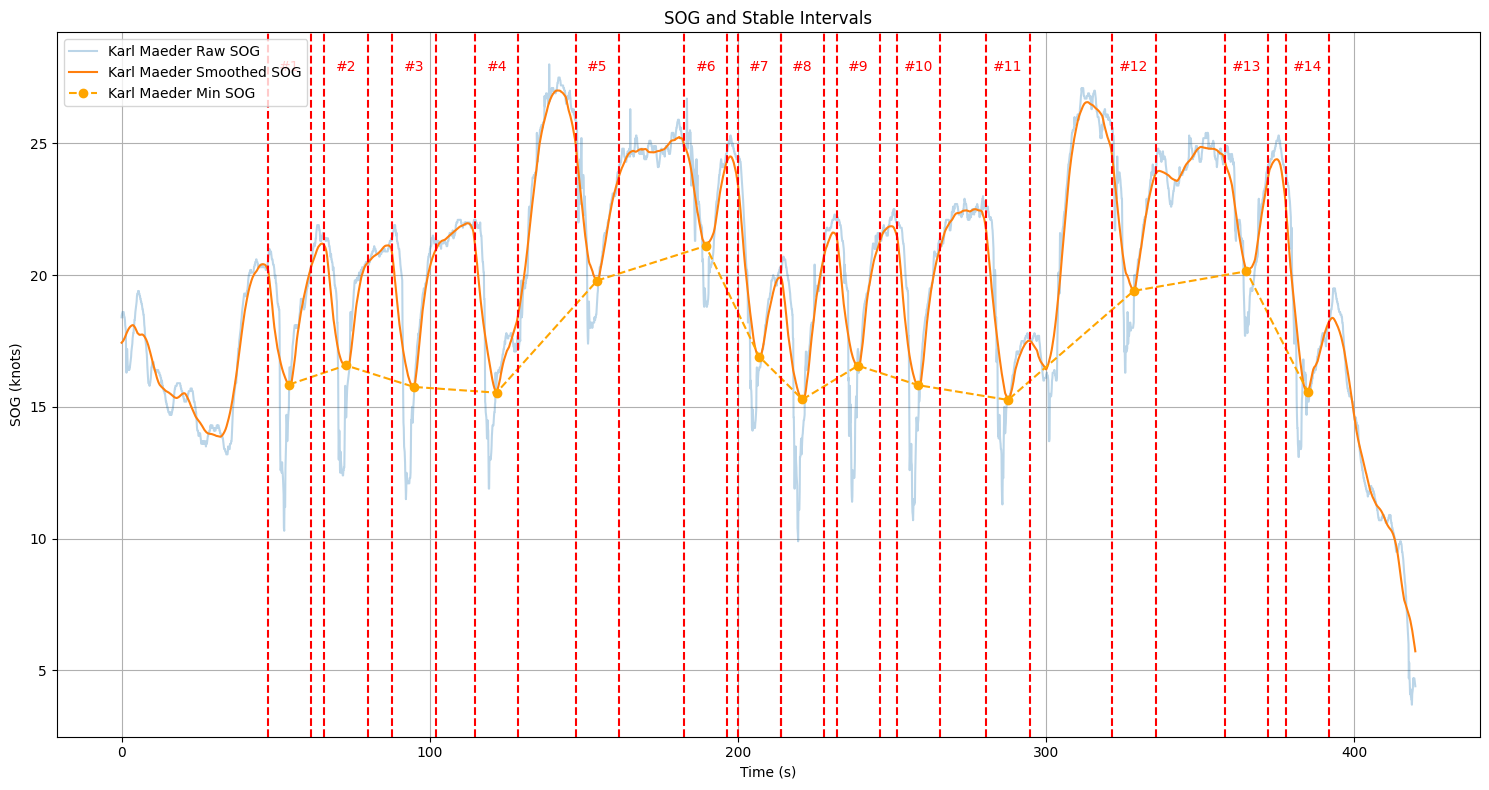

✔ Analyse réussie, nombre d'intervalles : 14
Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run6


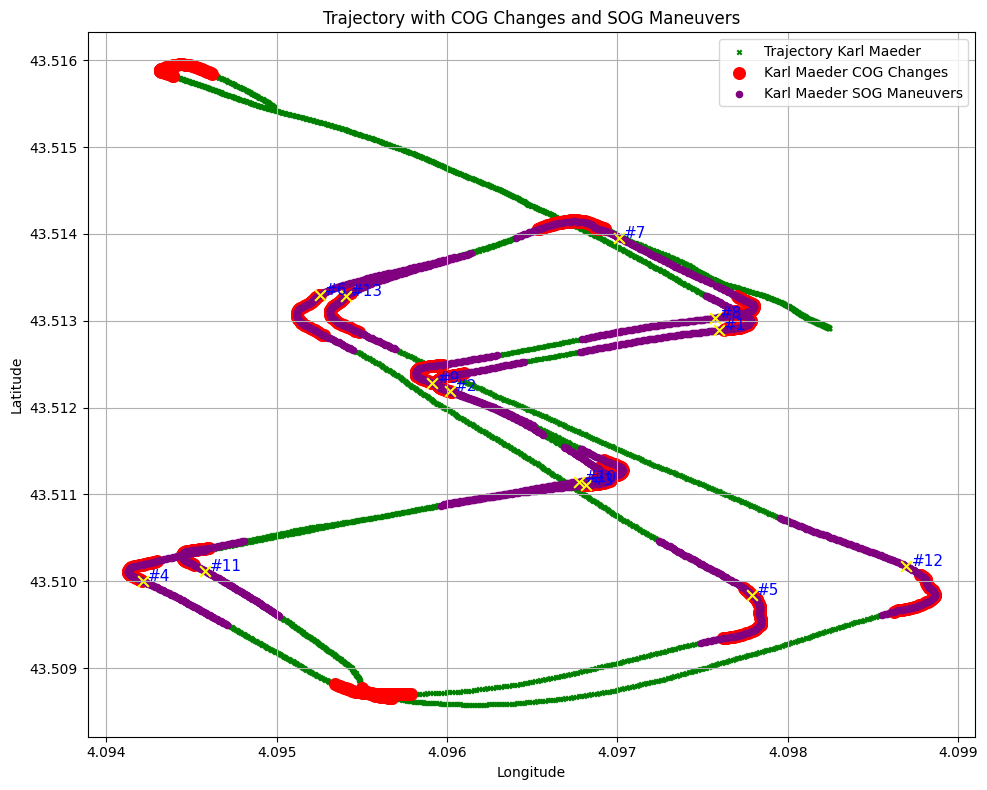

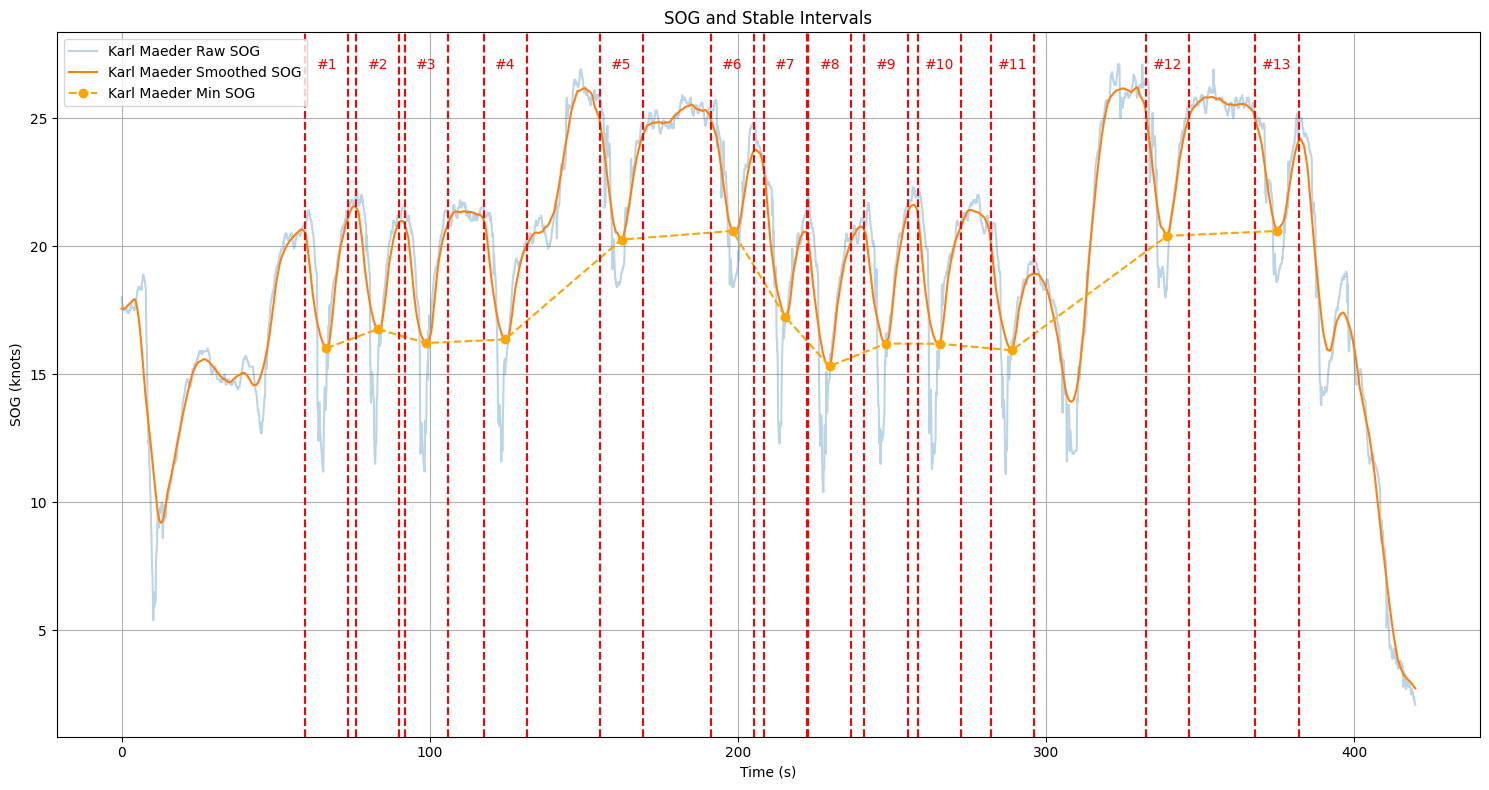

✔ Analyse réussie, nombre d'intervalles : 13
Résumé complet sauvegardé (22 runs)


In [1]:
import os
import json
from cog_analysis import analyze_session
from natsort import natsorted

summary = []

base_dir = "../Data_Sailnjord/Maneuvers"

# Parcours tous les dossiers de date
for date_folder in sorted(os.listdir(base_dir)):
    date_path = os.path.join(base_dir, date_folder)

    if not os.path.isdir(date_path):
        continue

    # Parcours tous les dossiers de personne dans chaque date
    for person_folder in sorted(os.listdir(date_path)):
        person_path = os.path.join(date_path, person_folder)

        if not os.path.isdir(person_path):
            continue

        # Parcours tous les dossiers de run dans chaque dossier de personne
        for run_folder in natsorted(os.listdir(person_path)):
            run_path = os.path.join(person_path, run_folder)

            if not os.path.isdir(run_path):
                continue

            # Cherche un fichier CSV dans le run
            csv_files = [f for f in os.listdir(run_path) if f.endswith(".csv")]
            if len(csv_files) != 1:
                print(f"Ignoré: {run_path} (attendu 1 CSV, trouvé {len(csv_files)})")
                continue

            csv_path = os.path.join(run_path, csv_files[0])
            print(f"Analyse: {csv_files[0]} dans {run_path}")
            try:
                intervals = analyze_session(
                    boat1_path=csv_path, 
                    boat2_path=None, 
                    cog_threshold=30.0, # detect_COG_changes_rolling_mean
                    window=30,  #detect_COG_changes_rolling_mean

                    sog_smoothing_window=75, #detect_maneuvers_from_sog_minima
                    sog_prominence=2, #detect_maneuvers_from_sog_minima
                    sog_min_duration=10.0, #detect_maneuvers_from_sog_minima
                    twa_threshold=90.0, #detect_maneuvers_from_sog_minima
                    cog_inversion_threshold=45.0, #detect_maneuvers_from_sog_minima
                    min_minima_distance=12.0, #detect_maneuvers_from_sog_minima
                    pre_window = 7.0, 
                    post_window = 7.0,
                    min_sog_entry_threshold = 18.0,

                    #Following parameters useless for maneuvers (only used when there is 2 boats to wompare)
                    top_n_intervals=2, # compute_longest_intervals 
                    min_duration_sec=40.0, #compute_longest_intervals
                    sog_derivative_threshold=0.3, #compute_longest_intervals
                    smoothing_window=100  #compute_longest_intervals
                )

                print(f"✔ Analyse réussie, nombre d'intervalles : {len(intervals)}")
                
                summary.append({
                    "date": date_folder,
                    "person": person_folder,
                    "run": run_folder,
                    "intervals": intervals
                })

            except Exception as e:
                import traceback
                print(f"❌ Erreur dans {run_path} : {type(e).__name__} - {e}")
                traceback.print_exc()


# Sauvegarde du résumé
summary_file = "summary.json"
with open(summary_file, "w") as f:
    json.dump(summary, f, indent=2)

print(f"Résumé complet sauvegardé ({len(summary)} runs)")


In [2]:
print(json.dumps(summary, indent=2))

[
  {
    "date": "08_06",
    "person": "Gian",
    "run": "08_06_Run1",
    "intervals": [
      {
        "maneuver_index": 1,
        "maneuver_time": 1749369722.957,
        "maneuver_type": "Tack",
        "duration": 14.0,
        "start_time": 1749369716.072,
        "end_time": 1749369730.072
      },
      {
        "maneuver_index": 2,
        "maneuver_time": 1749369738.263,
        "maneuver_type": "Tack",
        "duration": 13.911999940872192,
        "start_time": 1749369731.355,
        "end_time": 1749369745.267
      },
      {
        "maneuver_index": 3,
        "maneuver_time": 1749369753.357,
        "maneuver_type": "Tack",
        "duration": 14.08400011062622,
        "start_time": 1749369746.36,
        "end_time": 1749369760.444
      },
      {
        "maneuver_index": 4,
        "maneuver_time": 1749369772.556,
        "maneuver_type": "Tack",
        "duration": 14.002000093460083,
        "start_time": 1749369765.556,
        "end_time": 1749369779.558
